In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
%matplotlib inline
import folium
from folium.plugins import HeatMap
import datetime
from datetime import date
import math
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffect
from sklearn.metrics import mean_squared_error
from sklearn.cluster import SpectralClustering
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import preprocessing
from random import sample 
import plotly.express as px
import xgboost as xgb
sns.set(rc={'figure.figsize':(20,10)})
sns.set(style="white", context="talk")

%matplotlib inline

In [2]:
! pip install scikit-learn

In [3]:
arrest = pd.read_csv("NYPD_Arrest_Data__Year_to_Date_.csv")
arrest[:5]
raw_data = pd.read_csv('NYPD_7_Major_Felony_Incidents.csv')

C:\Users\nagan\AppData\Local\Temp\ipykernel_10548\55069042.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('NYPD_7_Major_Felony_Incidents.csv')


The NYPD Arrest Data Year to Date dataset provides information on arrests made by the New York City Police Department (NYPD) from January 1st of the current year to the present. The data includes various attributes related to the arrests such as the date, time and location of the arrest, the crime committed, age and gender of the arrestee, and the arresting officer's details. 

The dataset is updated on a daily basis, and it contains data for all five boroughs of New York City: Brooklyn, Queens, Manhattan, The Bronx, and Staten Island. The data is publicly available and can be downloaded in various formats such as CSV, JSON, and XML. 

The dataset is meant to provide transparency and accountability to the public about the NYPD's arrest activities. It can be used by researchers, policymakers, journalists, and citizens to analyze trends and patterns in the arrest data and to identify any biases or disparities in the arrest practices of the NYPD.

In [4]:
raw_data.head()

OBJECTID  Identifier         Occurrence Date Day of Week Occurrence Month   
0         1   987726459  09/21/1982 11:20:00 PM     Tuesday              Sep  \
1         2   987726401  08/08/1991 10:15:00 PM    Thursday              Aug   
2         3   987726875  03/17/2014 12:00:00 PM      Monday              Mar   
3         4   987725414  07/30/2014 09:41:00 PM   Wednesday              Jul   
4         5   987726422  08/08/2014 11:46:00 PM      Friday              Aug   

   Occurrence Day  Occurrence Year  Occurrence Hour CompStat Month   
0              21             1982             2300            Apr  \
1               8             1991             2200            Mar   
2              17             2014             1200            Jun   
3              30             2014             2100            Jan   
4               8             2014             2300            Mar   

   CompStat Day  CompStat Year Offense Offense Classification Sector Precinct   
0             9           2015  MURDER                 FELONY    NaN      079  \
1            10           2015  MURDER                 FELONY      A      030   
2            26           2015  MURDER                 FELONY    NaN      067   
3            28           2015  MURDER                 FELONY      H      120   
4            13           2015  MURDER                 FELONY      D      041   

         Borough Jurisdiction  XCoordinate  YCoordinate   
0       Brooklyn         NYPD       999634       190253  \
1      Manhattan         NYPD       996234       238317   
2       Brooklyn         NYPD       999132       175384   
3  Staten Island         NYPD       959784       171202   
4          Bronx         NYPD      1013232       236725   

                              Location 1  
0      (40.688872153, -73.9445290319999)  
1      (40.8208008500001, -73.956703266)  
2      (40.6480609220001, -73.946371991)  
3  (40.6365609370001, -74.0881530469999)  
4          (40.816391847, -73.895296414)

The NYPD Arrest Data (Year to Date) dataset contains information on arrests made by the New York City Police Department from January 1, 2021, to the end of the previous year. The dataset has 19 columns which include:

- OBJECTID: unique identifier for each arrest
- Identifier: an additional identifier for each arrest
- Occurrence Date: date and time of occurrence of the offense
- Day of Week: day of the week of the occurrence date
- Occurrence Month: month of occurrence of the offense
- Occurrence Day: day of the month of occurrence of the offense
- Occurrence Year: year of occurrence of the offense
- Occurrence Hour: hour of occurrence of the offense
- CompStat Month: month in which the offense was reported in the CompStat
- CompStat Day: day in which the offense was reported in the CompStat
- CompStat Year: year in which the offense was reported in the CompStat
- Offense: type of offense committed
- Offense Classification: classification of the offense as felony or misdemeanor
- Sector: sector in which the offense was committed
- Precinct: precinct in which the offense was committed
- Borough: borough in which the offense was committed
- Jurisdiction: jurisdiction in which the arrest was made
- XCoordinate: X coordinate of the location where the arrest was made
- YCoordinate: Y coordinate of the location where the arrest was made
- Location 1: a combination of the latitude and longitude coordinates of the location where the arrest was made.

In [5]:
raw_data.dtypes

OBJECTID                   int64
Identifier                 int64
Occurrence Date           object
Day of Week               object
Occurrence Month          object
Occurrence Day             int64
Occurrence Year            int64
Occurrence Hour            int64
CompStat Month            object
CompStat Day               int64
CompStat Year              int64
Offense                   object
Offense Classification    object
Sector                    object
Precinct                  object
Borough                   object
Jurisdiction              object
XCoordinate                int64
YCoordinate                int64
Location 1                object
dtype: object

In [6]:
df = raw_data[(raw_data['Occurrence Year'] >= 2006) & (raw_data['Occurrence Year'] <= 2015)].copy()

In [7]:
df['OBJECTID'] = df['OBJECTID'].fillna(0).astype(int)
df['Occurrence Day'] = df['Occurrence Day'].fillna(0).astype(int)
df['Occurrence Year'] = df['Occurrence Year'].fillna(0).astype(int)
df['Occurrence Hour'] = df['Occurrence Hour'].fillna(0).astype(int)
df['CompStat Month'] = pd.to_numeric(df['CompStat Month'], errors='coerce').fillna(0).astype(int)
df['CompStat Day'] = df['CompStat Day'].fillna(0).astype(int)
df['CompStat Year'] = df['CompStat Year'].fillna(0).astype(int)
df['Precinct'] = pd.to_numeric(df['Precinct'], errors='coerce').fillna(0).astype(int)
df['Offense'] = df['Offense'].astype('category')
df['Offense Classification'] = df['Offense Classification'].astype('category')
df['Sector'] = df['Sector'].astype('category')
df['Precinct'] = df['Precinct'].astype('category')
df['Borough'] = df['Borough'].astype('category')
df['Occurrence Date'] = pd.to_datetime(df['Occurrence Date'])

The fillna() method is used to fill missing values in certain columns with 0.
The astype() method is used to convert the data type of certain columns to the desired type (integer, category, etc.).
The pd.to_numeric() method is used to convert certain columns to numeric type.
The pd.to_datetime() method is used to convert the Occurrence Date column to a datetime type.

In [8]:
df.dtypes

OBJECTID                           int32
Identifier                         int64
Occurrence Date           datetime64[ns]
Day of Week                       object
Occurrence Month                  object
Occurrence Day                     int32
Occurrence Year                    int32
Occurrence Hour                    int32
CompStat Month                     int32
CompStat Day                       int32
CompStat Year                      int32
Offense                         category
Offense Classification          category
Sector                          category
Precinct                        category
Borough                         category
Jurisdiction                      object
XCoordinate                        int64
YCoordinate                        int64
Location 1                        object
dtype: object

In [9]:
df.sort_values('Occurrence Date', inplace=True)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df.head()

OBJECTID       Identifier     Occurrence Date Day of Week Occurrence Month   
0       278  201507688340964 2006-01-01 08:00:00      Sunday              Jan  \
1       279  201507088062964 2006-01-01 12:00:00      Sunday              Jan   
2     39601  201504988100864 2006-01-01 12:01:00      Sunday              Jan   
3       277  201506987926764 2006-01-01 12:02:00      Sunday              Jan   
4       280  201509287880364 2006-07-07 12:01:00      Friday              Jul   

   Occurrence Day  Occurrence Year  Occurrence Hour  CompStat Month   
0               1             2006              800               0  \
1               1             2006             1200               0   
2               1             2006                0               0   
3               1             2006                0               0   
4               7             2006                0               0   

   CompStat Day  CompStat Year        Offense Offense Classification Sector   
0             2           2015           RAPE                 FELONY      M  \
1            26           2015           RAPE                 FELONY      E   
2            21           2015  GRAND LARCENY                 FELONY      B   
3            28           2015           RAPE                 FELONY      H   
4            26           2015           RAPE                 FELONY      J   

  Precinct   Borough         Jurisdiction  XCoordinate  YCoordinate   
0       67  Brooklyn                 NYPD       998032       175598  \
1       61  Brooklyn  NYPD-HOUSING BUREAU       995244       155739   
2       40     Bronx                 NYPD      1010680       234533   
3       60  Brooklyn                 NYPD       990922       149184   
4       83  Brooklyn                 NYPD      1006965       193571   

                              Location 1  
0          (40.648650085, -73.950335563)  
1      (40.5941451690001, -73.960414952)  
2  (40.8103834250001, -73.9045248039999)  
3        (40.5761573, -73.9759837999999)  
4      (40.697963515, -73.9180833619999)

Df is sorted using the occurence date.

In [12]:
g = df.groupby(df['Offense'])

In [13]:
g.describe()

OBJECTID                                        
                                  count     mean      min       25%      50%   
Offense                                                                        
BURGLARY                        10945.0  34113.0  28641.0  31377.00  34113.0  \
FELONY ASSAULT                  15056.0  21112.5  13585.0  17348.75  21112.5   
GRAND LARCENY                   31640.0  55420.5  39601.0  47510.75  55420.5   
GRAND LARCENY OF MOTOR VEHICLE   5513.0  73999.0  71243.0  72621.00  73999.0   
MURDER                            255.0    130.0      3.0     66.50    130.0   
RAPE                             1061.0    807.0    277.0    542.00    807.0   
ROBBERY                         12246.0   7461.5   1339.0   4400.25   7461.5   

                                                               Identifier   
                                     75%      max          std      count   
Offense                                                                     
BURGLARY                        36849.00  39585.0  3159.693682    10945.0  \
FELONY ASSAULT                  24876.25  28640.0  4346.437162    15056.0   
GRAND LARCENY                   63330.25  71240.0  9133.825595    31640.0   
GRAND LARCENY OF MOTOR VEHICLE  75377.00  76755.0  1591.610348     5513.0   
MURDER                            193.50    257.0    73.756356      255.0   
RAPE                             1072.00   1337.0   306.428621     1061.0   
ROBBERY                         10522.75  13584.0  3535.260033    12246.0   

                                              ... XCoordinate                 
                                        mean  ...         max           std   
Offense                                       ...                             
BURGLARY                        2.015079e+14  ...   1066770.0  21756.254779  \
FELONY ASSAULT                  2.015074e+14  ...   1065860.0  20121.194386   
GRAND LARCENY                   2.015065e+14  ...   1067050.0  20512.869135   
GRAND LARCENY OF MOTOR VEHICLE  2.015083e+14  ...   1067113.0  21185.528502   
MURDER                          7.510270e+13  ...   1057636.0  18643.010451   
RAPE                            2.015069e+14  ...   1057636.0  19921.736722   
ROBBERY                         2.015074e+14  ...   1065710.0  19181.807195   

                               YCoordinate                            
                                     count           mean       min   
Offense                                                               
BURGLARY                           10945.0  203519.938511  123081.0  \
FELONY ASSAULT                     15056.0  208759.134166  124331.0   
GRAND LARCENY                      31640.0  206302.863116  122410.0   
GRAND LARCENY OF MOTOR VEHICLE      5513.0  205338.367858  125837.0   
MURDER                               255.0  205710.768627  149076.0   
RAPE                                1061.0  209140.230914  125837.0   
ROBBERY                            12246.0  208605.956884  125062.0   

                                                                          
                                      25%       50%       75%       max   
Offense                                                                   
BURGLARY                        183496.00  199030.0  224929.0  271520.0  \
FELONY ASSAULT                  183581.25  205736.0  238800.5  270928.0   
GRAND LARCENY                   187526.00  207641.0  221675.5  271820.0   
GRAND LARCENY OF MOTOR VEHICLE  183392.00  199848.0  233660.0  271485.0   
MURDER                          182227.50  194772.0  238036.5  267302.0   
RAPE                            183798.00  206772.0  236725.0  262634.0   
ROBBERY                         184352.75  204468.0  238687.0  269974.0   

                                              
                                         std  
Offense                                       
BURGLARY                        29634.125107  
FELONY ASSAULT    

In [14]:
df['Occurrence Date'].groupby(df['Offense']).count()

Offense
BURGLARY                          10945
FELONY ASSAULT                    15056
GRAND LARCENY                     31640
GRAND LARCENY OF MOTOR VEHICLE     5513
MURDER                              255
RAPE                               1061
ROBBERY                           12246
Name: Occurrence Date, dtype: int64

Grouping the Occurrence Date column by the Offense column and then counting the number of occurrences for each unique value in the Offense column.

The output shows the number of occurrences for each offense type in the dataset. For example, there were 10,945 occurrences of burglary, 15,056 occurrences of felony assault, 31,640 occurrences of grand larceny, and so on.

In [15]:
offense_by_hour = df['Occurrence Date'].groupby([df['Occurrence Hour'], df['Offense']]).count().unstack()
offense_by_hour.head()

Offense          BURGLARY  FELONY ASSAULT  GRAND LARCENY   
Occurrence Hour                                            
0                     390             841           1677  \
100                   301             747            833   
200                   336             662            662   
300                   322             600            599   
400                   321             663            454   

Offense          GRAND LARCENY OF MOTOR VEHICLE  MURDER  RAPE  ROBBERY  
Occurrence Hour                                                         
0                                           259      11   194      630  
100                                         204      18    66      651  
200                                         174      16    59      625  
300                                         147      15    37      587  
400                                         123      11    57      609

The offenses are categorized into seven types: BURGLARY, FELONY ASSAULT, GRAND LARCENY, GRAND LARCENY OF MOTOR VEHICLE, MURDER, RAPE, and ROBBERY.

Looking at the table, it appears that the highest number of offenses occurred in the afternoon and early evening, between 12:00 pm and 7:00 pm, with a peak at 5:00 pm. The number of offenses tends to decrease during the night and early morning hours.

The most frequent offense is Grand Larceny, followed by Robbery, Felony Assault, and Burglary.

There are relatively few offenses of Murder and Rape compared to the other types of offenses.

This table could be useful for law enforcement agencies to allocate their resources more effectively by focusing on areas and times with higher crime rates.



<Axes: title={'center': 'Absolute Number of Crimes per Hour by Offense'}, xlabel='Occurrence Hour'>

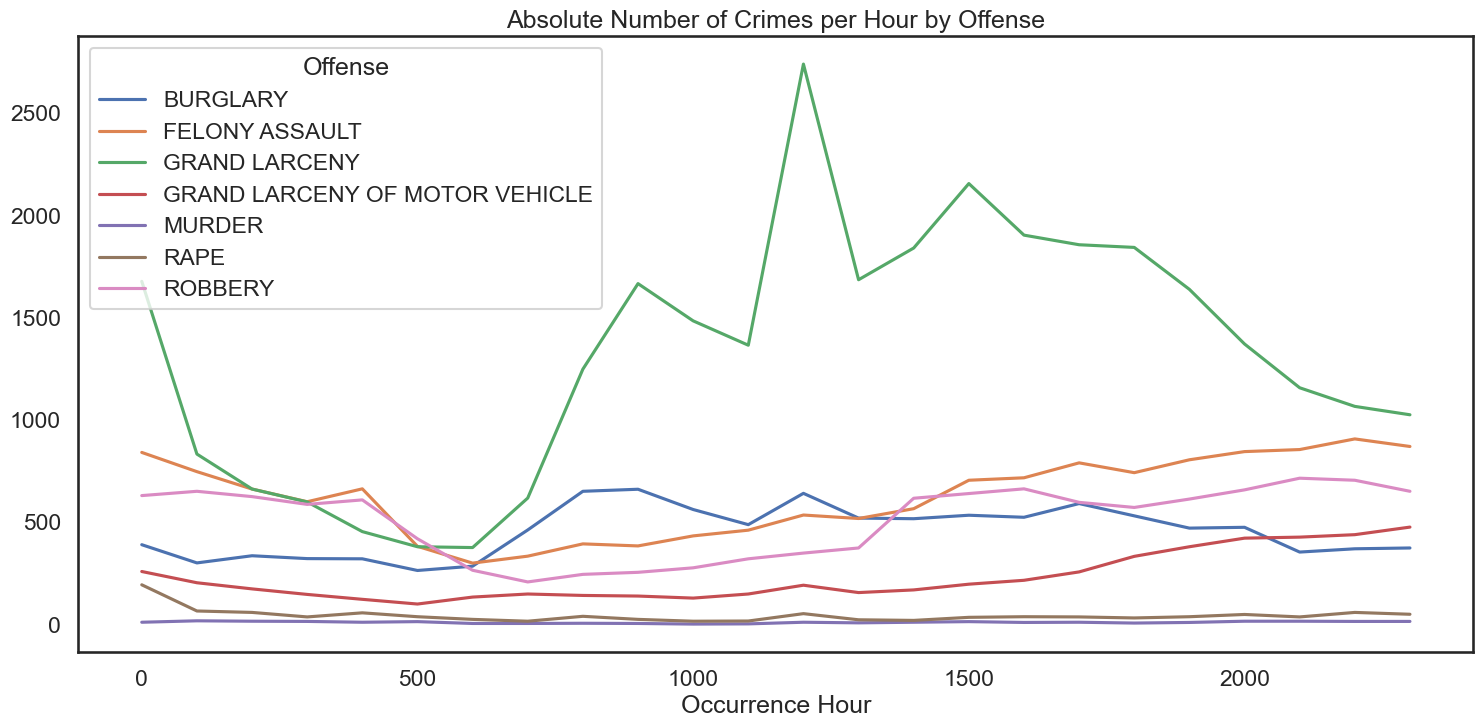

In [16]:
offense_by_hour.plot(figsize=(18,8), title='Absolute Number of Crimes per Hour by Offense')

In [17]:
first_day = df['Occurrence Date'][2]
last_day = df['Occurrence Date'].max()
delta = last_day - first_day
days = delta.days-1
print("Number of days in time period:", days)

Number of days in time period: 3558


In [18]:
df['Date'] = df['Occurrence Date'].dt.date

In [19]:
df['Occurrence Date'] = pd.to_datetime(df['Occurrence Date'])
df['Month-Day'] = df['Occurrence Date'].dt.strftime('%m-%d')

For the holidays, I am using this dataset https://www.kaggle.com/datasets/donnetew/us-holiday-dates-2004-2021, I am taking only 2015 data.

In [20]:
holidays = pd.read_csv('US Holiday Dates (2004-2021).csv')
holidays['Date'] = pd.to_datetime(holidays['Date'])
holidays['Month'] = [date.date().month for date in holidays['Date']]
holidays['Day'] = [date.date().day for date in holidays['Date']]
holidays['Month-Day'] = list(zip(holidays.Month, holidays.Day))
holidays = holidays[holidays['Year'] == 2015]
holidays.head()

Date         Holiday   WeekDay  Month  Day  Year Month-Day
11 2015-07-04     4th of July  Saturday      7    4  2015    (7, 4)
29 2015-12-25   Christmas Day    Friday     12   25  2015  (12, 25)
47 2015-12-24   Christmas Eve  Thursday     12   24  2015  (12, 24)
66 2015-10-12    Columbus Day    Monday     10   12  2015  (10, 12)
76 2015-04-12  Eastern Easter    Sunday      4   12  2015   (4, 12)

In [21]:
df['Summer Vacation'] = np.where((df['Occurrence Month'] == 'Jul') | (df['Occurrence Month'] =='Aug')
                                 | ((df['Occurrence Month'] == 'Sep') & (df['Occurrence Day'] < 9)),1,0)
df['Weekend Day'] = np.where(((df['Day of Week'] == 'Saturday') | (df['Day of Week'] == 'Sunday')),1,0)
df['Weekday Holiday'] = [1 if monthday in list(holidays['Month-Day']) else 0 for monthday in df['Month-Day']]
df['School Day'] = np.where((df['Summer Vacation'] != 1) & (df['Weekend Day'] != 1) & (df['Weekday Holiday'] !=1),1,0)

Summer Vacation: This column is created based on the month and day of each row. If the month is July or August, or if it is September and the day is less than 9, then the value in the column is set to 1, otherwise it is set to 0. The purpose of this column is to indicate whether or not the row corresponds to a date during the summer vacation period.

Weekend Day: This column is created based on the day of the week of each row. If the day is Saturday or Sunday, then the value in the column is set to 1, otherwise it is set to 0. The purpose of this column is to indicate whether or not the row corresponds to a weekend day.

Weekday Holiday: This column is created based on the month and day of each row and the holidays DataFrame that was read in earlier. For each row, the month and day are combined into a tuple and compared to the list of month-day tuples in the holidays DataFrame. If the tuple is in the list, then the value in the column is set to 1, otherwise it is set to 0. The purpose of this column is to indicate whether or not the row corresponds to a weekday holiday.

School Day: This column is created based on the values in the Summer Vacation, Weekend Day, and Weekday Holiday columns. If all of these columns have a value of 0 for a given row, then the value in the School Day column is set to 1, otherwise it is set to 0. The purpose of this column is to indicate whether or not the row corresponds to a school day.



In [22]:
def day_type(row):
    if row['Summer Vacation'] == 1:
        return 'Summer Vacation'
    if row['Weekend Day'] == 1:
        return 'Weekend Day'
    if row['Weekday Holiday'] == 1:
        return 'Weekday Holiday'
    if row['School Day'] == 1:
        return 'School Day'

df['Day Type'] = df.apply(lambda row: day_type(row), axis=1)

Function day_type which takes a row of a DataFrame as input, and returns a string indicating the type of day (e.g. "Summer Vacation", "Weekend Day", "Weekday Holiday", "School Day").

The function checks the values of four columns in the input row: "Summer Vacation", "Weekend Day", "Weekday Holiday", and "School Day". It returns the appropriate string based on which of these columns is equal to 1.

The second part of the code applies this function to each row of the DataFrame df using the apply method, and creates a new column called "Day Type" in df with the results.

In [23]:
df['Day Type'] = df['Day Type'].astype('category')

In [24]:
df.dtypes

OBJECTID                           int32
Identifier                         int64
Occurrence Date           datetime64[ns]
Day of Week                       object
Occurrence Month                  object
Occurrence Day                     int32
Occurrence Year                    int32
Occurrence Hour                    int32
CompStat Month                     int32
CompStat Day                       int32
CompStat Year                      int32
Offense                         category
Offense Classification          category
Sector                          category
Precinct                        category
Borough                         category
Jurisdiction                      object
XCoordinate                        int64
YCoordinate                        int64
Location 1                        object
Date                              object
Month-Day                         object
Summer Vacation                    int32
Weekend Day                        int32
Weekday Holiday 

In [25]:
crimes_by_day_type = df['Occurrence Date'].groupby([df['Occurrence Hour'], df['Day Type']]).count().unstack()
crime_rate_hourly_by_day_type = crimes_by_day_type.div(days)

crime_rate_hourly_by_day_type.head()

Day Type         School Day  Summer Vacation  Weekend Day
Occurrence Hour                                          
0                  0.545531         0.326026     0.253232
100                0.326588         0.265318     0.200675
200                0.255200         0.246487     0.210512
300                0.230185         0.219224     0.198988
400                0.216695         0.209949     0.202361

It groups the data by both occurrence hour and day type and counts the number of crimes that occurred during each hour for each type of day. It then calculates the crime rate per hour for each day type by dividing the count by the total number of days in the dataset.

The resulting output is a table where the rows represent the hour of occurrence and the columns represent the day types. The values in each cell represent the crime rate per hour for the corresponding day type and hour of occurrence.

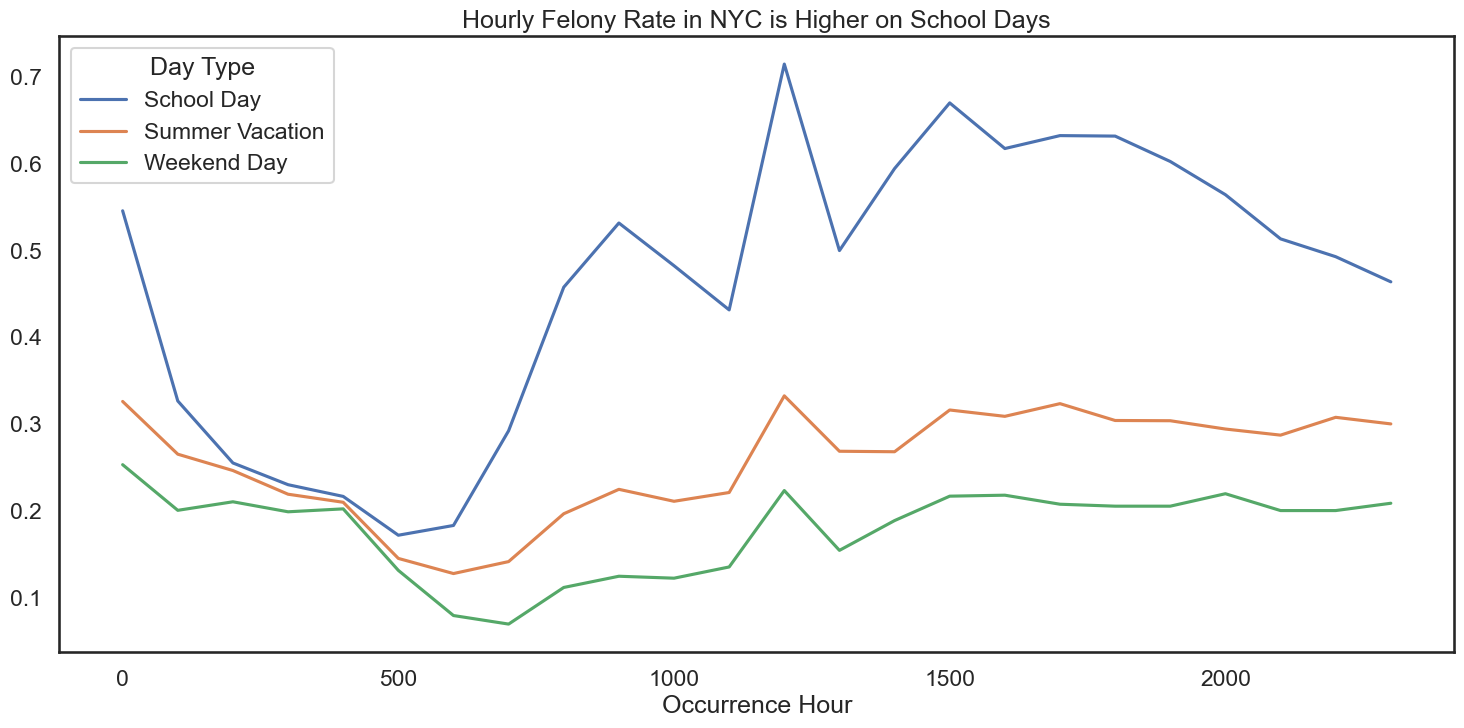

In [26]:
crime_rate_hourly_by_day_type.plot(figsize=(18,8), title='Hourly Felony Rate in NYC is Higher on School Days');

In [27]:
robbery = df[df['Offense'] == 'ROBBERY']

robbery_by_day_type = robbery['Occurrence Date'].groupby([robbery['Occurrence Hour'], robbery['Day Type']]).count().unstack()
robbery_rate_hourly_by_day_type = robbery_by_day_type.div(days)

robbery_rate_hourly_by_day_type.head()

Day Type         School Day  Summer Vacation  Weekend Day
Occurrence Hour                                          
0                  0.075042         0.060989     0.041034
100                0.075885         0.066329     0.040753
200                0.060427         0.065767     0.049466
300                0.057336         0.064643     0.043002
400                0.056773         0.059303     0.055087

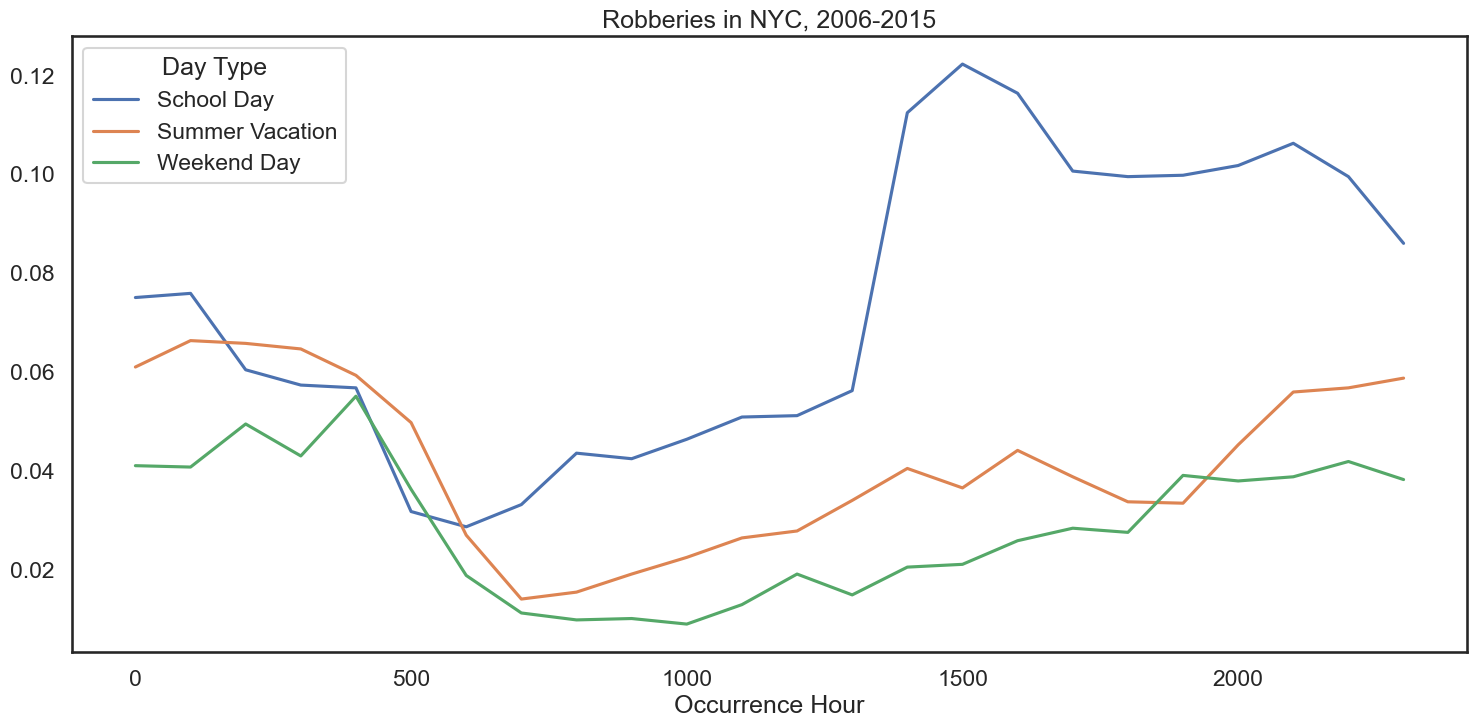

In [28]:
robbery_rate_hourly_by_day_type.plot(figsize=(18,8), title='Robberies in NYC, 2006-2015');

In [29]:
burglary = df[df['Offense'] == 'BURGLARY']

burglary_by_day_type = burglary['Occurrence Date'].groupby([burglary['Occurrence Hour'], burglary['Day Type']]).count().unstack()
burglary_rate_hourly_by_day_type = burglary_by_day_type.div(days)

burglary_rate_hourly_by_day_type.head()

Day Type         School Day  Summer Vacation  Weekend Day
Occurrence Hour                                          
0                  0.054244         0.031759     0.023609
100                0.047780         0.021922     0.014896
200                0.044969         0.029230     0.020236
300                0.046093         0.025014     0.019393
400                0.042159         0.027263     0.020798

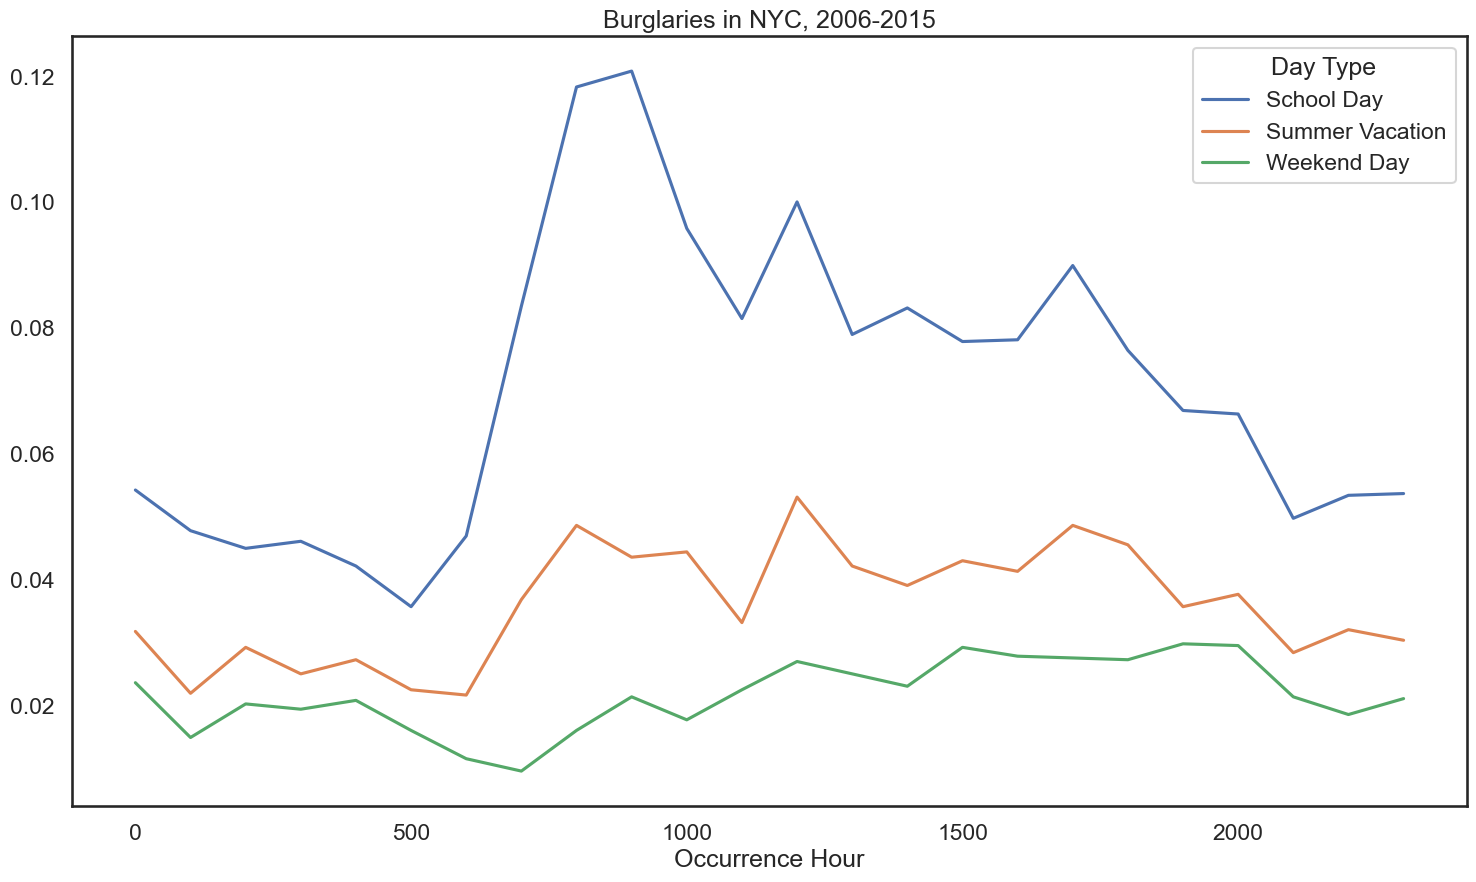

In [30]:
burglary_rate_hourly_by_day_type.plot(figsize=(18,10), title='Burglaries in NYC, 2006-2015');

In [31]:
felonyassault = df[df['Offense'] == 'FELONY ASSAULT']

felonyassault_by_day_type = felonyassault['Occurrence Date'].groupby([felonyassault['Occurrence Hour'], felonyassault['Day Type']]).count().unstack()
felonyassault_rate_hourly_by_day_type = felonyassault_by_day_type.div(days)

felonyassault_rate_hourly_by_day_type.head()

Day Type         School Day  Summer Vacation  Weekend Day
Occurrence Hour                                          
0                  0.097808         0.077291     0.061270
100                0.076728         0.071388     0.061832
200                0.057336         0.066048     0.062676
300                0.048904         0.053682     0.066048
400                0.055649         0.061551     0.069140

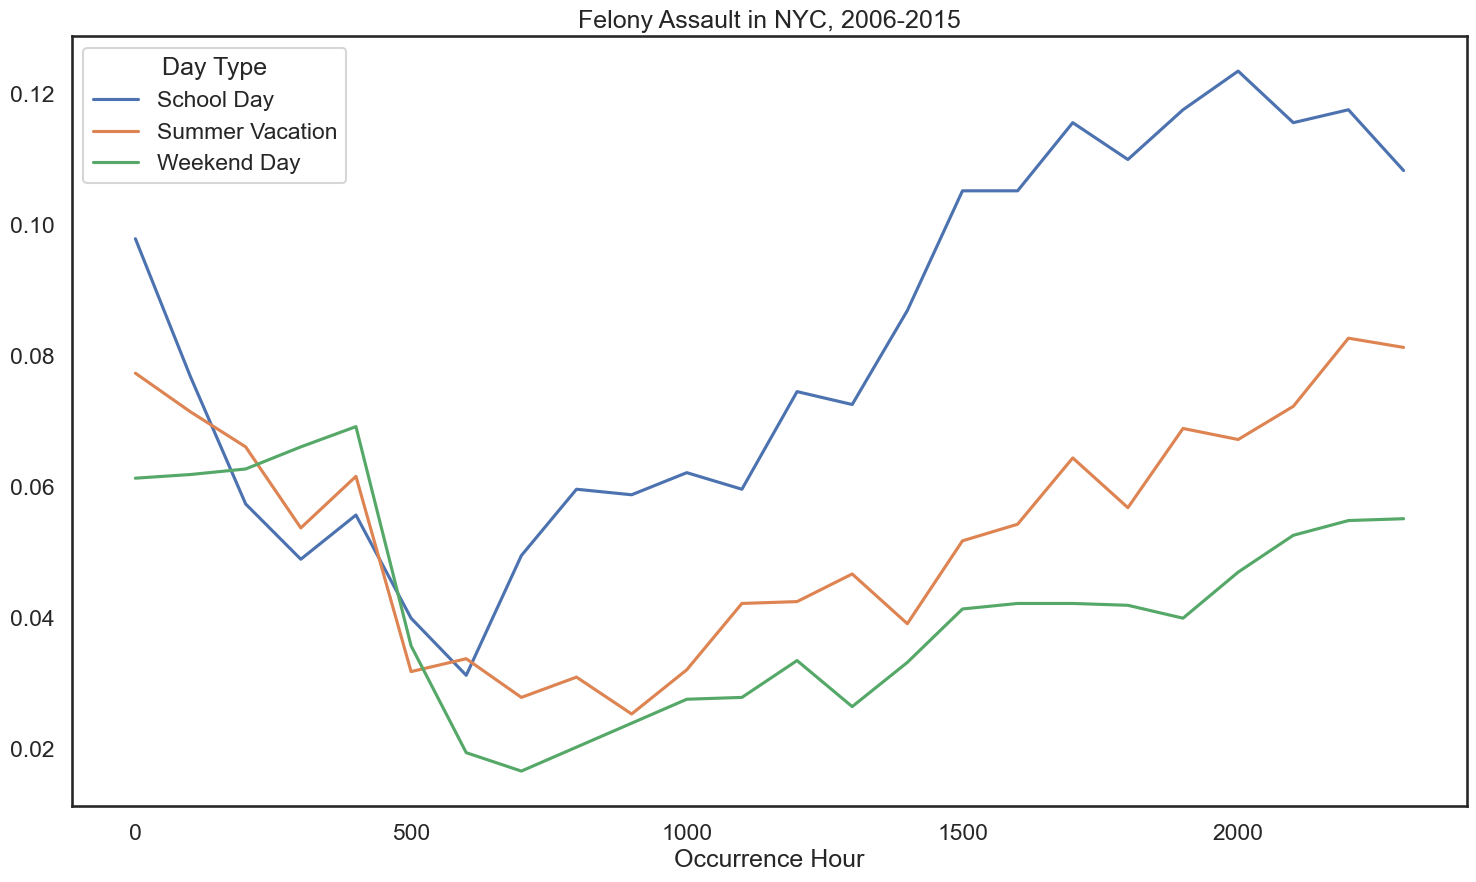

In [32]:
felonyassault_rate_hourly_by_day_type.plot(figsize=(18,10), title='Felony Assault in NYC, 2006-2015');


In [33]:
grandlarceny = df[df['Offense'] == 'GRAND LARCENY']

grandlarceny_by_day_type = grandlarceny['Occurrence Date'].groupby([grandlarceny['Occurrence Hour'], grandlarceny['Day Type']]).count().unstack()
grandlarceny_rate_hourly_by_day_type = grandlarceny_by_day_type.div(days)

grandlarceny_rate_hourly_by_day_type.head()

Day Type         School Day  Summer Vacation  Weekend Day
Occurrence Hour                                          
0                  0.252108         0.121979     0.097246
100                0.089657         0.078134     0.066329
200                0.064924         0.064362     0.056773
300                0.056211         0.054525     0.057617
400                0.039629         0.046936     0.041034

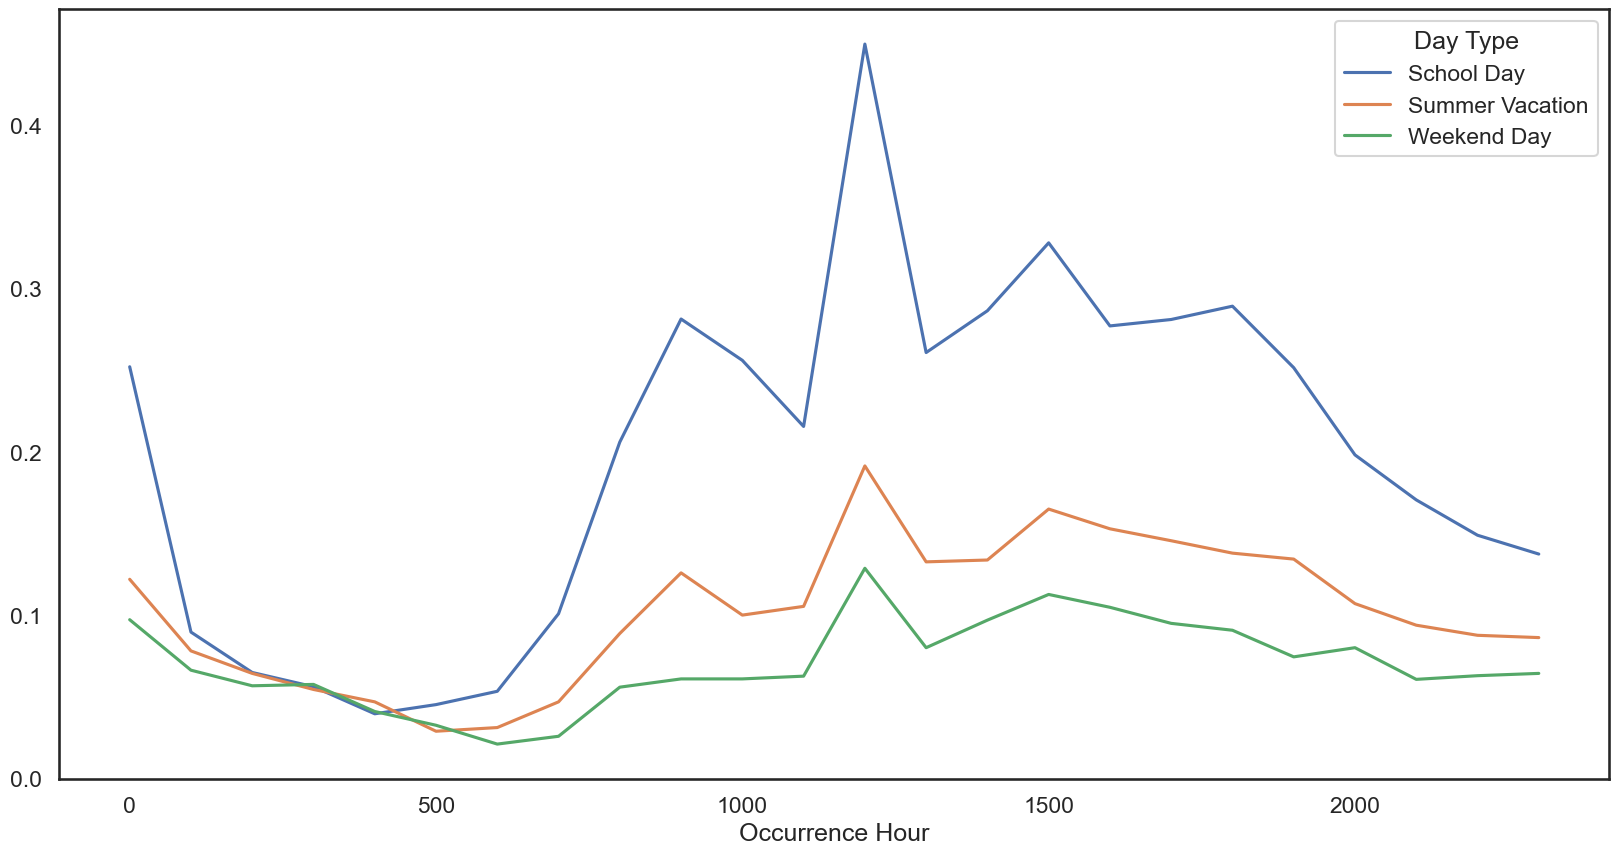

In [34]:
grandlarceny_rate_hourly_by_day_type.plot(figsize=(20,10));

In [35]:
grandlarcenymv = df[df['Offense'] == 'GRAND LARCENY OF MOTOR VEHICLE']

grandlarcenymv_by_day_type = grandlarcenymv['Occurrence Date'].groupby([grandlarcenymv['Occurrence Hour'],
                                                                        grandlarcenymv['Day Type']]).count().unstack()
grandlarcenymv_rate_hourly_by_day_type = grandlarcenymv_by_day_type.div(days)

grandlarcenymv_rate_hourly_by_day_type.head()

Day Type         School Day  Summer Vacation  Weekend Day
Occurrence Hour                                          
0                  0.034851         0.020798     0.017144
100                0.026419         0.019955     0.010961
200                0.021360         0.014334     0.013210
300                0.017144         0.016020     0.008151
400                0.016020         0.008151     0.010399

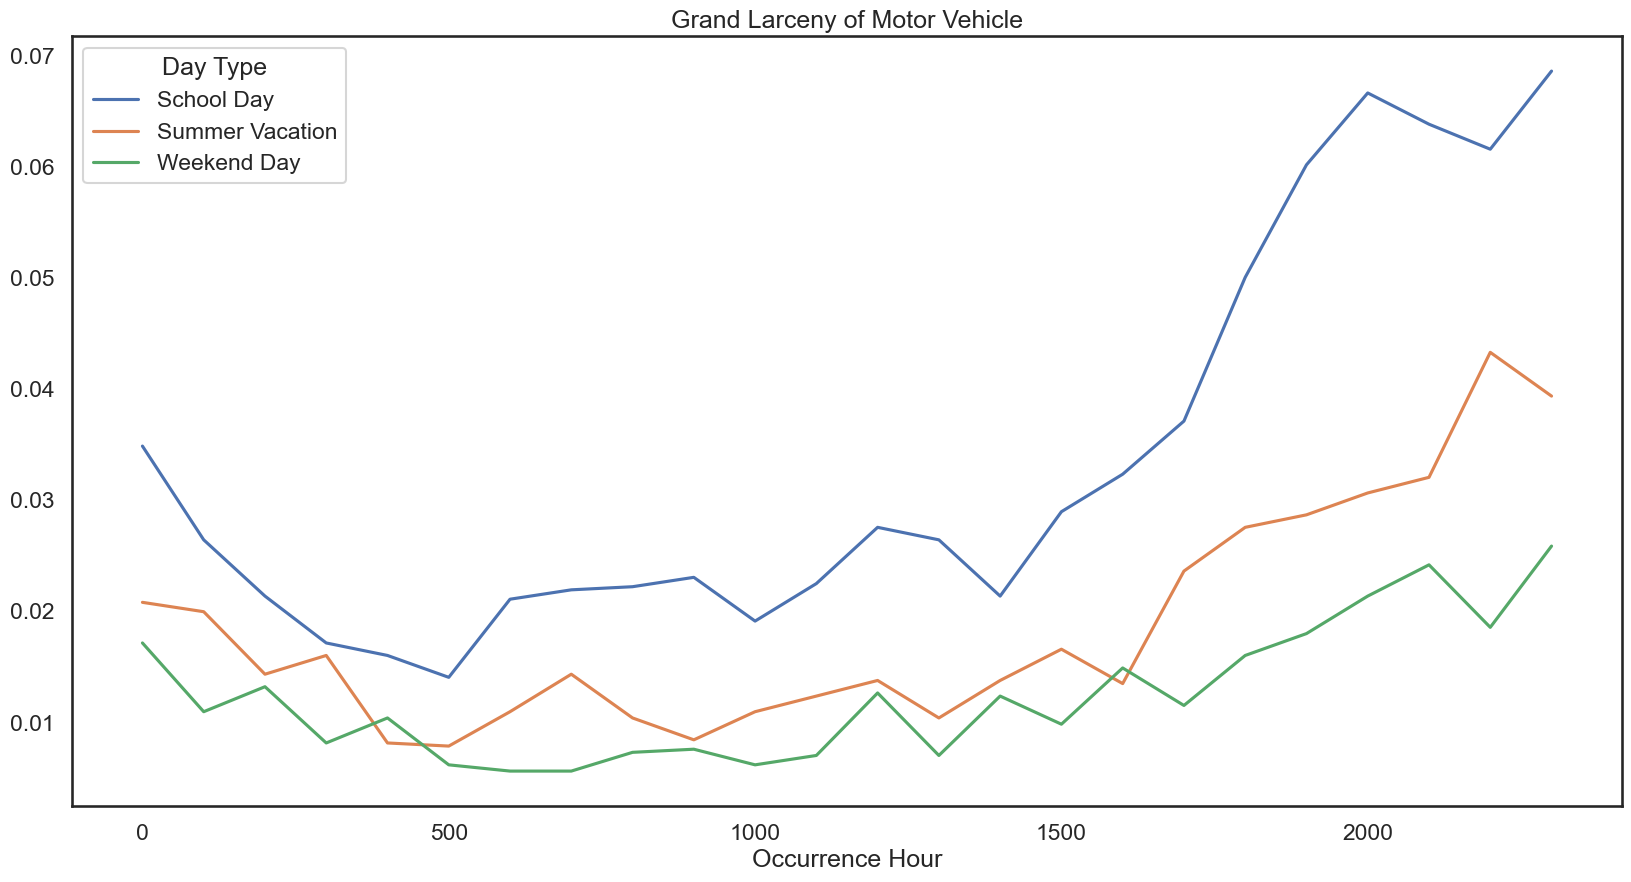

In [36]:
grandlarcenymv_rate_hourly_by_day_type.plot(figsize=(20,10), title='Grand Larceny of Motor Vehicle');

In [37]:
df[df['Day Type'] == 'School Day'].count()

OBJECTID                  39563
Identifier                39563
Occurrence Date           39563
Day of Week               39563
Occurrence Month          39563
Occurrence Day            39563
Occurrence Year           39563
Occurrence Hour           39563
CompStat Month            39563
CompStat Day              39563
CompStat Year             39563
Offense                   39563
Offense Classification    39563
Sector                    38588
Precinct                  39563
Borough                   39437
Jurisdiction              39560
XCoordinate               39563
YCoordinate               39563
Location 1                39563
Date                      39563
Month-Day                 39563
Summer Vacation           39563
Weekend Day               39563
Weekday Holiday           39563
School Day                39563
Day Type                  39563
dtype: int64

In [38]:
summer_days = len(np.unique(df[df['Day Type'] == 'Summer Vacation']['Month-Day']))
summer_days = summer_days * (2015-2006)

In [39]:
len(np.unique(df[df['Day Type'] == 'Weekday Holiday']['Month-Day']))

0

In [40]:
aggregations = {
    'OBJECTID': [('count', 'count'), ('hourly_rate', lambda x: x.count())]
}
g = df.groupby([df['Offense'].astype('str'), df['Occurrence Hour'], df['Day Type']]).agg(aggregations).unstack()
offenses = df['Offense'].unique()


<Axes: xlabel='Occurrence Hour'>

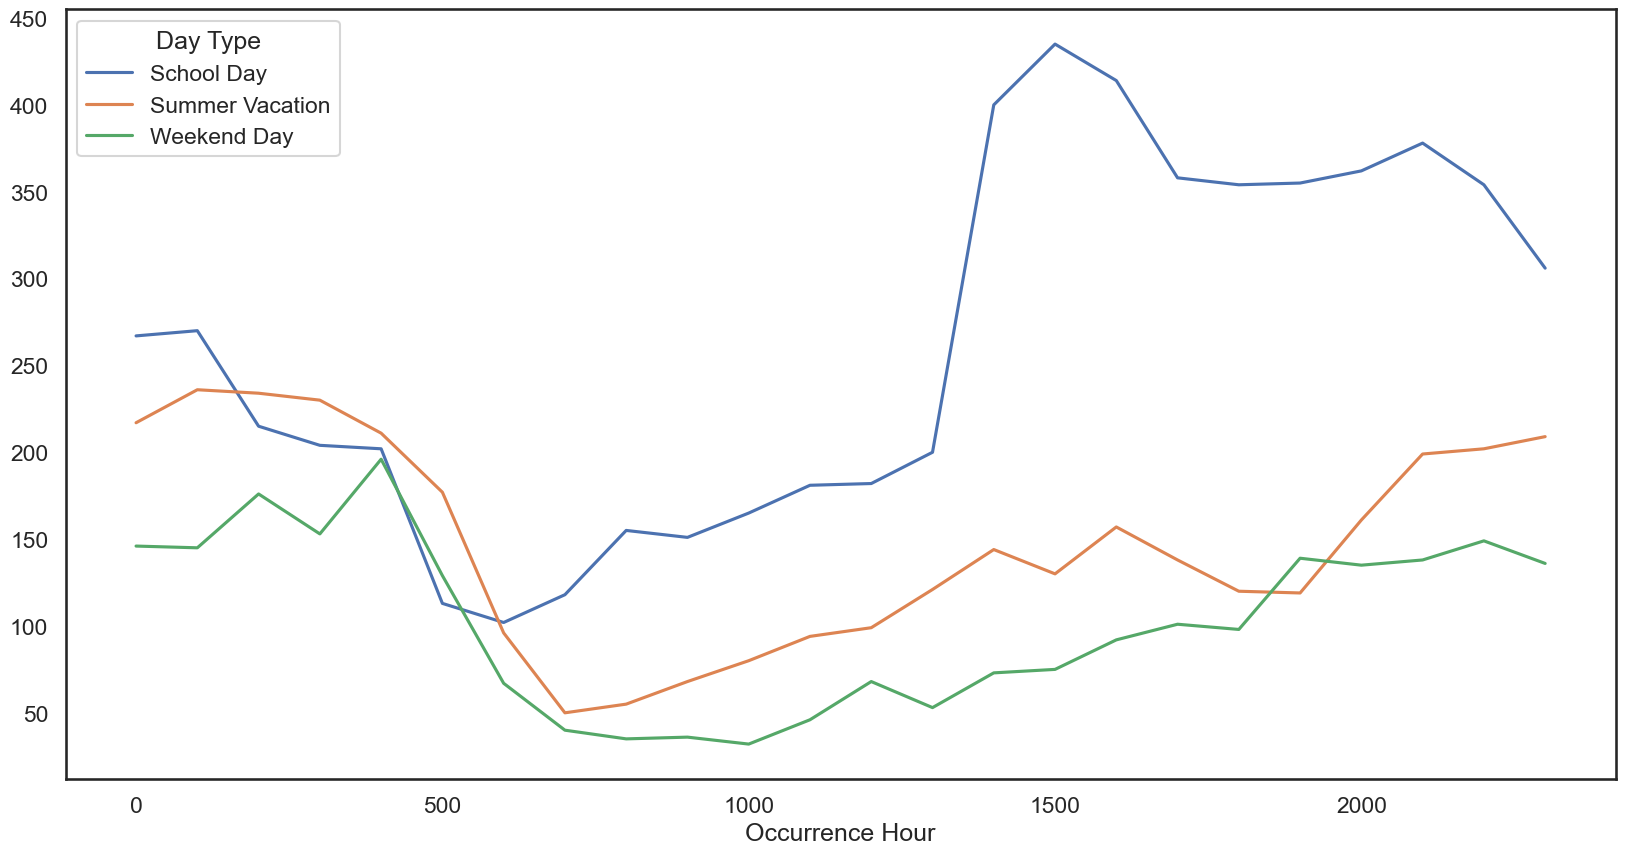

In [41]:
g.loc['ROBBERY',('OBJECTID', 'hourly_rate')].plot(figsize=(20,10))

In [42]:
offenses1 = offenses
for offense in offenses1:
    offense_df = df[df['Offense'] == offense]
    g = offense_df.groupby([offense_df['Occurrence Hour'], offense_df['Day Type']])\
                 .agg(aggregations).unstack()
    print(offense)
    print(g)

RAPE
                  OBJECTID                                           
                     count                             hourly_rate   
Day Type        School Day Summer Vacation Weekend Day  School Day   
Occurrence Hour                                                      
0                      107              43          44         107  \
100                     29              22          15          29   
200                     16              19          24          16   
300                     12              13          12          12   
400                     23              19          15          23   
500                     18               9          11          18   
600                      5              10          10           5   
700                     10               3           3          10   
800                     25               7           8          25   
900                     15               7           3          15   
1000           

In [43]:
g[('OBJECTID', 'hourly_rate')]

Day Type         School Day  Summer Vacation  Weekend Day
Occurrence Hour                                          
0                       5.0              4.0          2.0
100                     7.0              5.0          6.0
200                     6.0              5.0          5.0
300                     4.0              6.0          5.0
400                     NaN              5.0          6.0
500                     1.0              7.0          6.0
600                     2.0              2.0          1.0
700                     2.0              3.0          NaN
800                     3.0              2.0          1.0
900                     3.0              2.0          NaN
1000                    2.0              NaN          NaN
1100                    1.0              1.0          1.0
1200                    9.0              1.0          1.0
1300                    4.0              2.0          2.0
1400                    7.0              NaN          4.0
1500                    9.0              1.0          4.0
1600                    3.0              5.0          2.0
1700                    6.0              2.0          3.0
1800                    4.0              1.0          2.0
1900                    5.0              NaN          5.0
2000                    8.0              8.0          NaN
2100                   10.0              5.0          1.0
2200                    9.0              4.0          2.0
2300                    7.0              4.0          4.0

Based on the analysis, it appears that a majority of crimes are happening during school days, which suggests that there may be a correlation between school schedules and crime rates. To explore this further, one approach would be to create visualizations using mapping software, to identify spatial patterns in crime rates and potential hotspots.

In [44]:
def dayToWeek(date):
    week = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    date_time_obj = datetime.datetime.strptime(date, '%m/%d/%Y')
    return week[date_time_obj.weekday()]
def loc(code):
    code_dict = {'B': 'Bronx', 'S': 'Staten Island', 'K': 'Brooklyn', 'M': 'Manhattan' , 'Q': 'Queens'}
    return code_dict[code]
def fel(code):
    code_dict = {'F': 'Felony','M': 'Misdemeanor', 'V': 'Violation', 'I': 'Other'}
    if code in code_dict:
        return code_dict[code]
    else:
        return 'Other'

date = arrest['ARREST_DATE'].str.split("/", n = 3, expand = True)
arrest['year'] = date[2].astype('int32')
arrest['day'] = date[1].astype('int32')
arrest['month'] = date[0].astype('int32')

arrest['ARREST_BORO'] = arrest['ARREST_BORO'].apply(loc)
arrest['WEEKDAY'] = arrest['ARREST_DATE'].apply(dayToWeek)
arrest['LAW_CAT_CD'] = arrest['LAW_CAT_CD'].apply(fel)

arrest = arrest.drop(['ARREST_KEY', 'PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD'], axis=1)
arrest[:5]

ARREST_DATE                     OFNS_DESC   LAW_CAT_CD ARREST_BORO   
0  01/23/2022                      JOSTLING  Misdemeanor      Queens  \
1  01/31/2022                       ROBBERY       Felony    Brooklyn   
2  02/01/2022                FELONY ASSAULT       Felony    Brooklyn   
3  02/13/2022  ASSAULT 3 & RELATED OFFENSES  Misdemeanor   Manhattan   
4  02/21/2022                       ROBBERY       Felony    Brooklyn   

   ARREST_PRECINCT AGE_GROUP PERP_SEX PERP_RACE   Latitude  Longitude   
0              110     25-44        M     BLACK  40.755336 -73.843245  \
1               69     25-44        M     BLACK  40.648698 -73.905128   
2               61       65+        M     WHITE  40.594054 -73.960866   
3               28     45-64        M     BLACK  40.808623 -73.953492   
4               76     45-64        M     BLACK  40.689425 -73.992493   

           New Georeferenced Column  year  day  month  WEEKDAY  
0  POINT (-73.84324519 40.75533648)  2022   23      1   Sunday  
1      POINT (-73.905128 40.648698)  2022   31      1   Monday  
2      POINT (-73.960866 40.594054)  2022    1      2  Tuesday  
3      POINT (-73.953492 40.808623)  2022   13      2   Sunday  
4      POINT (-73.992493 40.689425)  2022   21      2   Monday

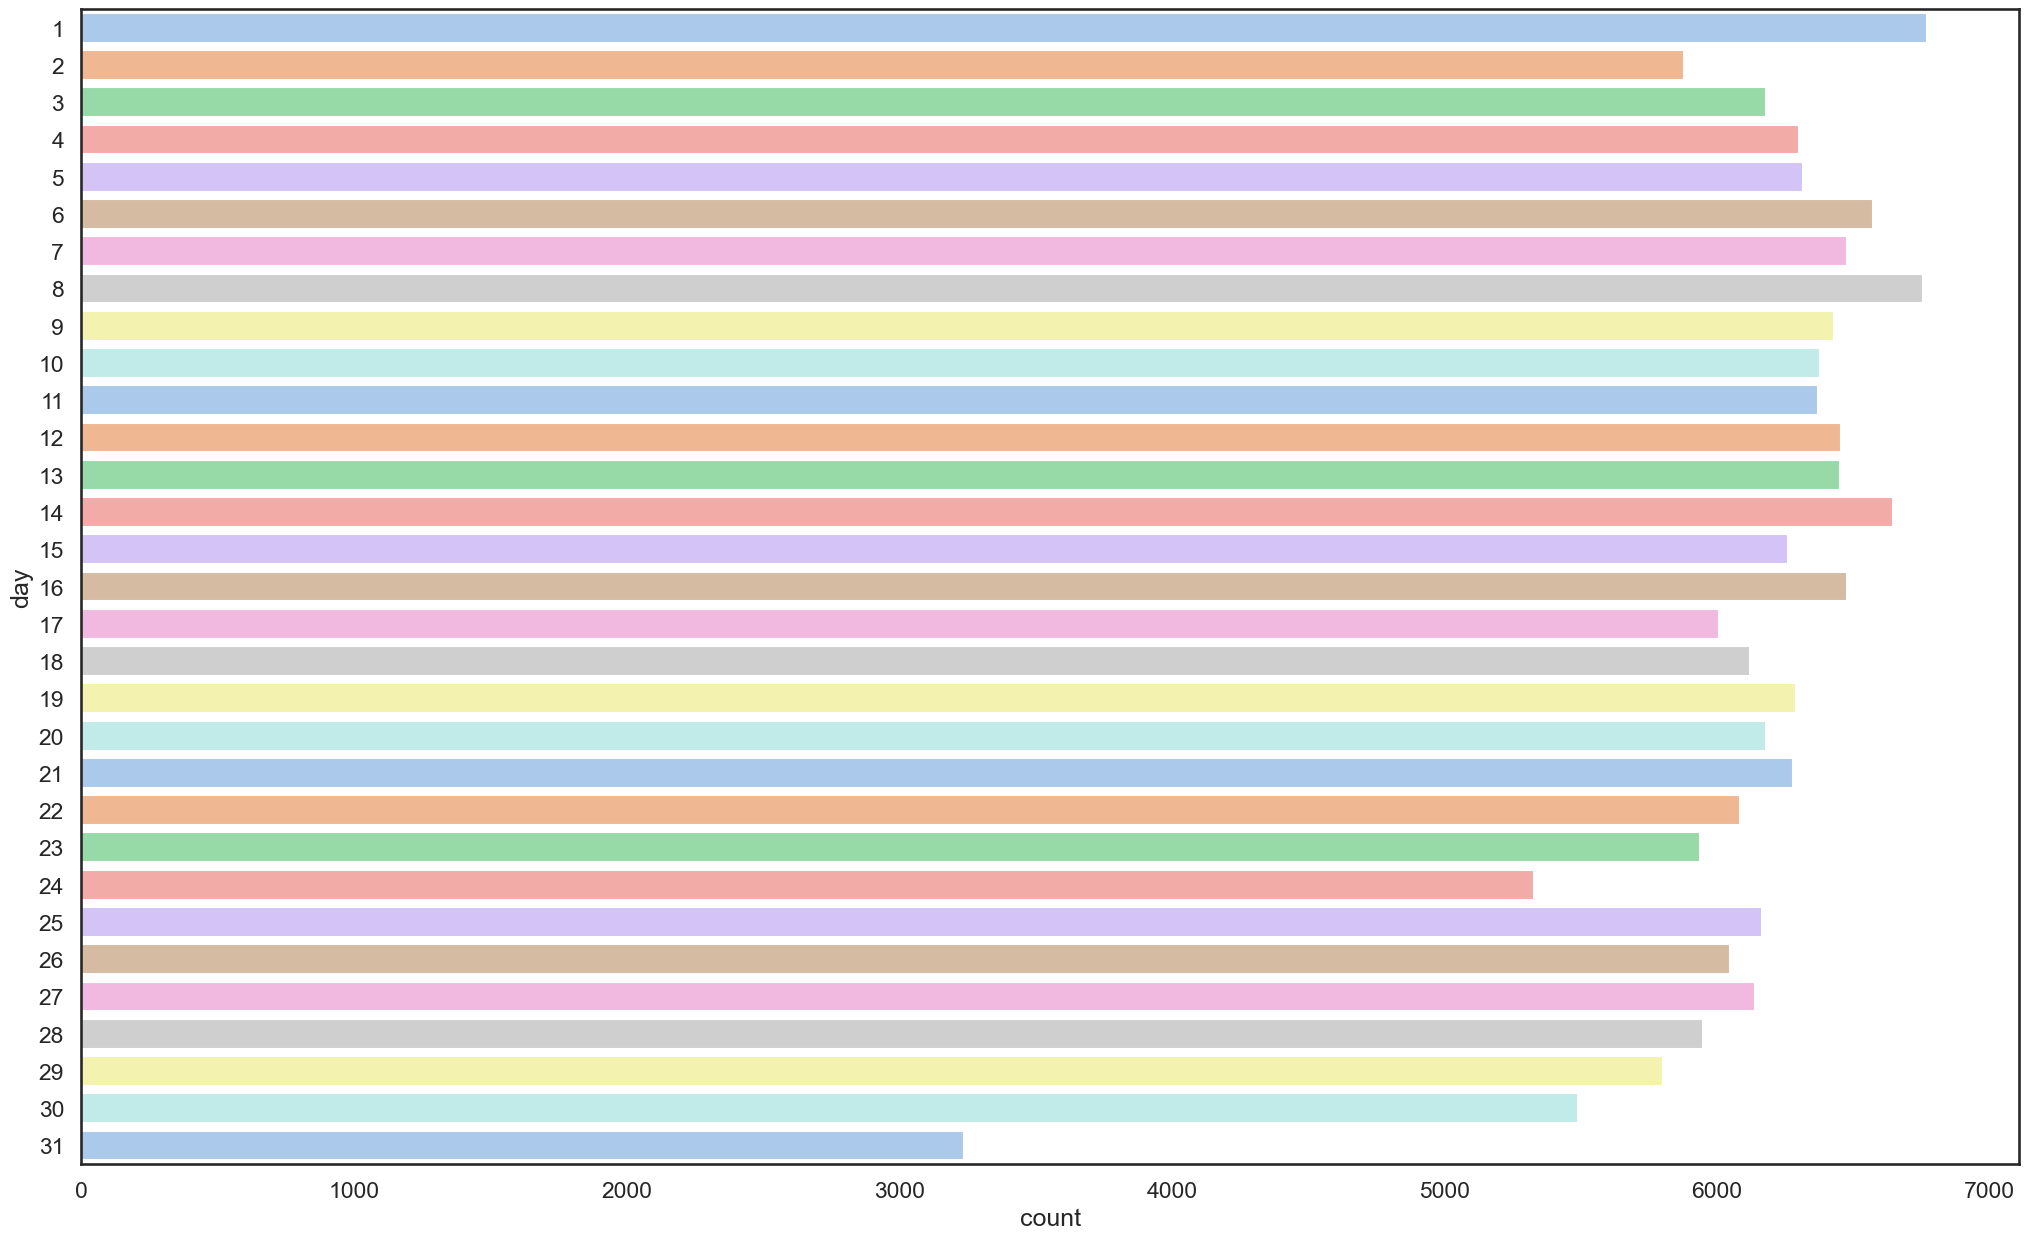

In [45]:
f, ax = plt.subplots(figsize=(25, 15))
sns.countplot(y="day", data=arrest, palette="pastel");

<Axes: xlabel='month', ylabel='count'>

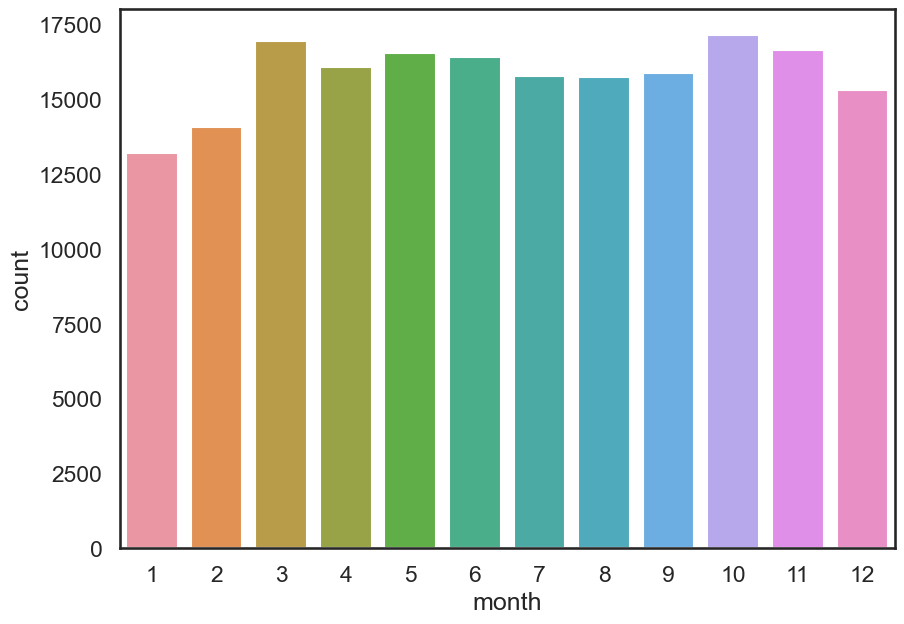

In [46]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x="month", data=arrest)

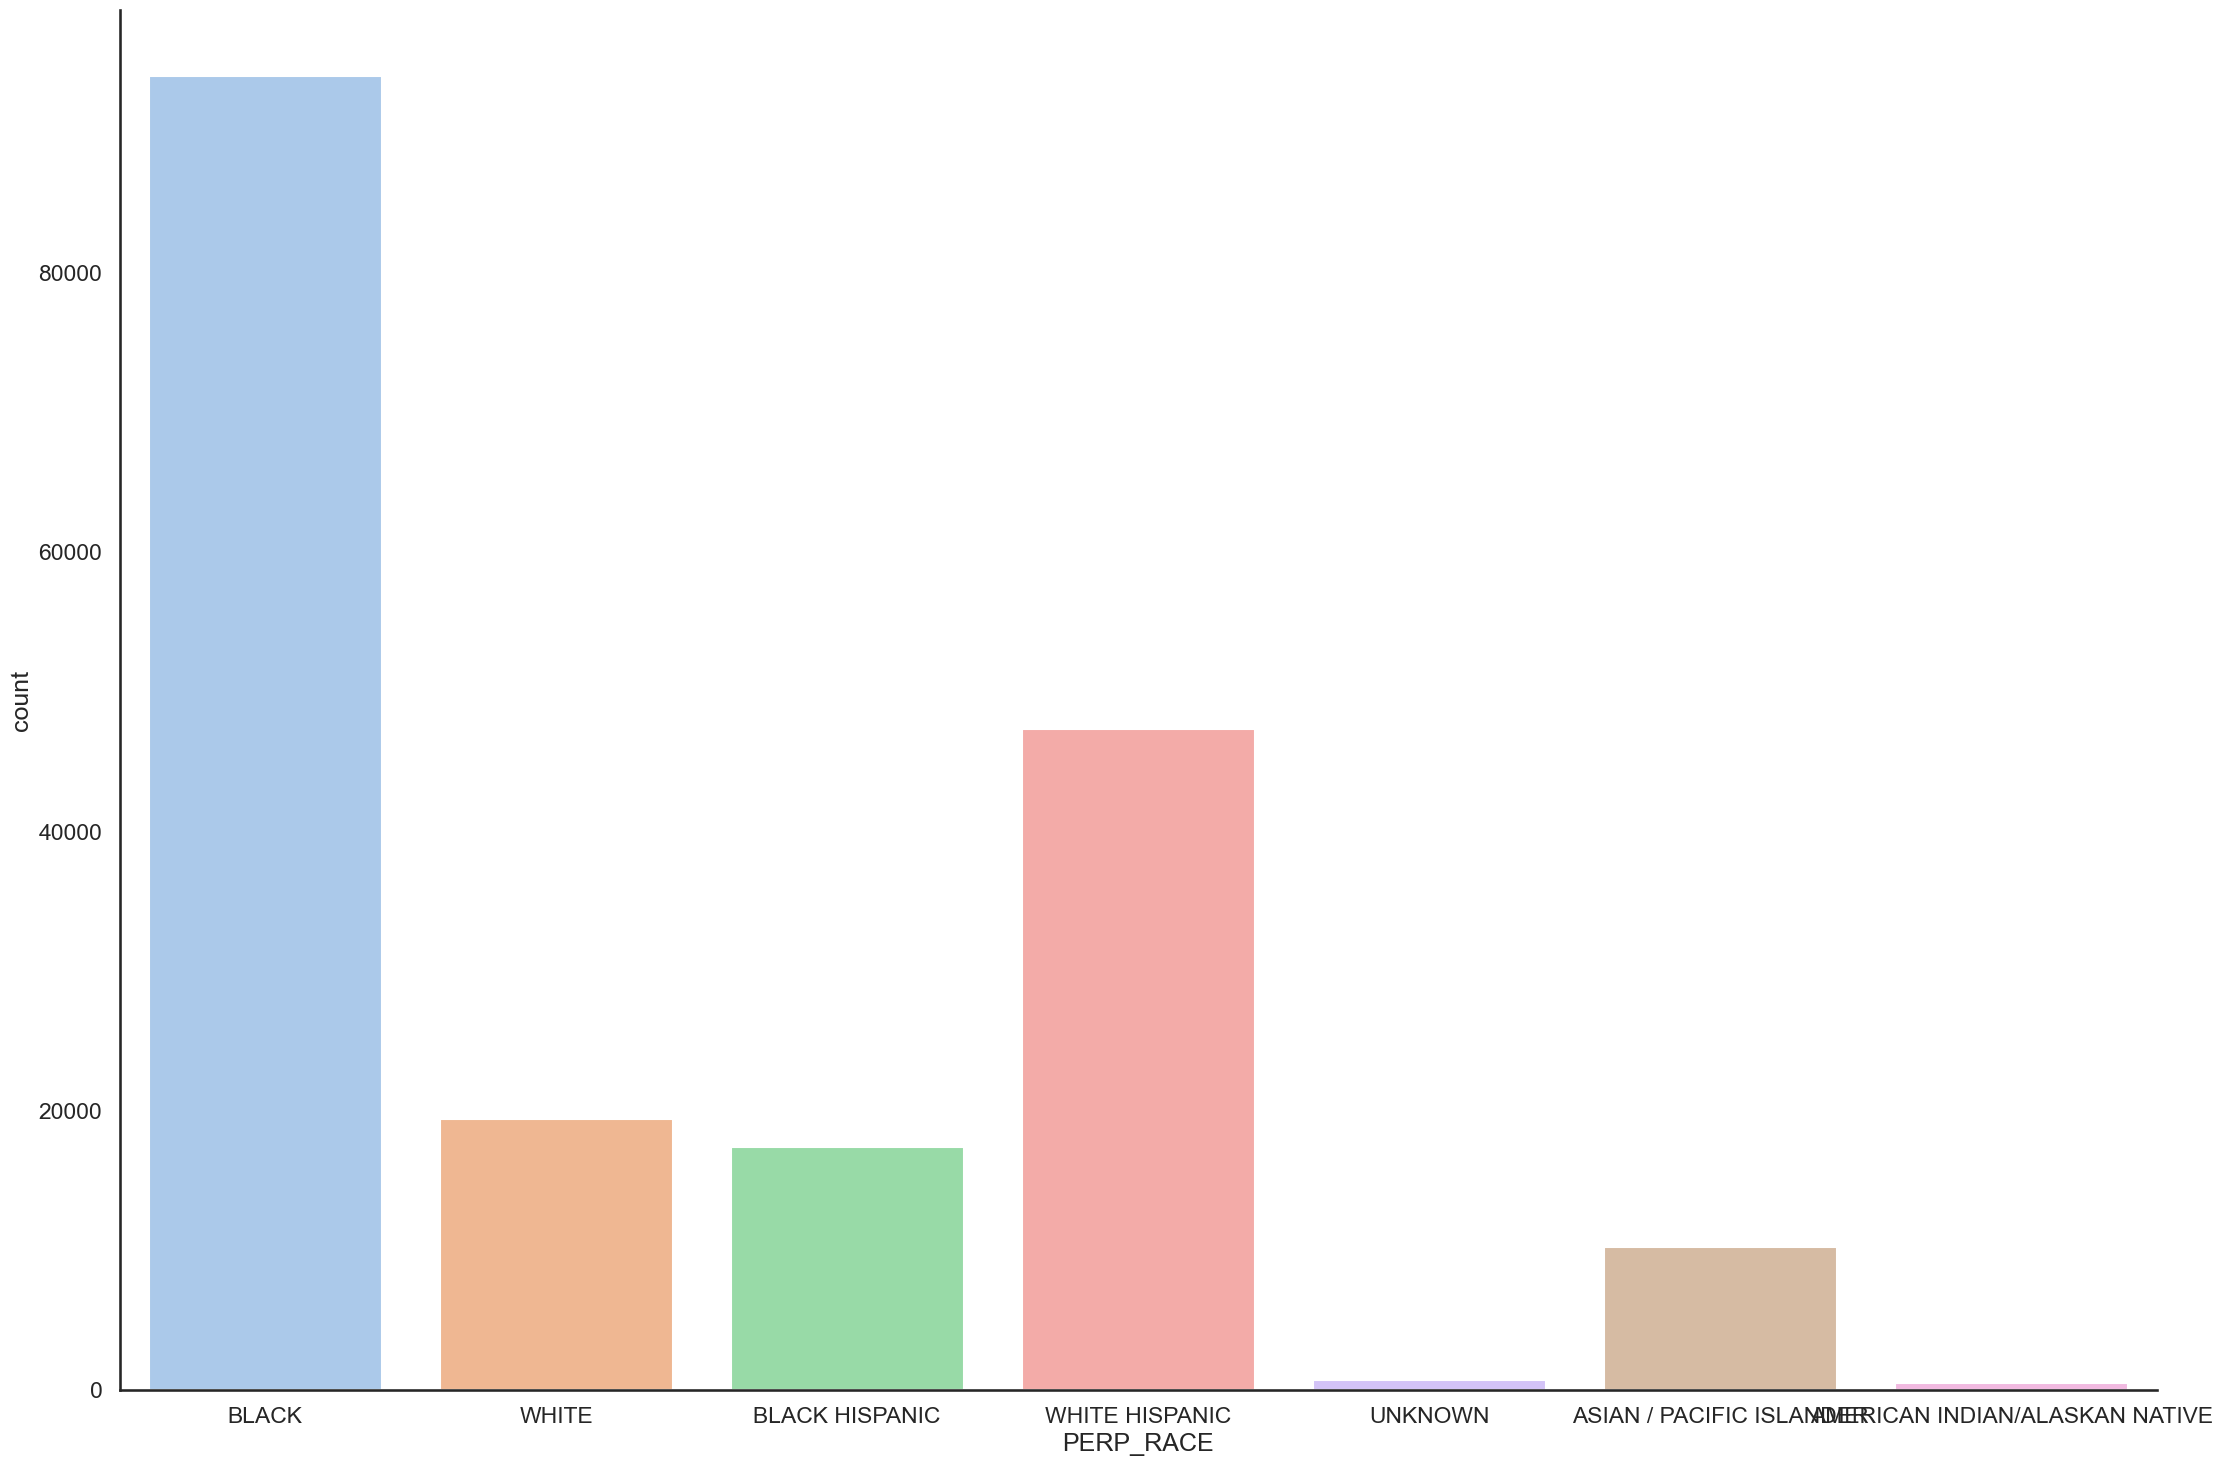

In [47]:
sns.catplot(x="PERP_RACE", data=arrest,kind="count", palette="pastel", height=15, aspect=1.5)

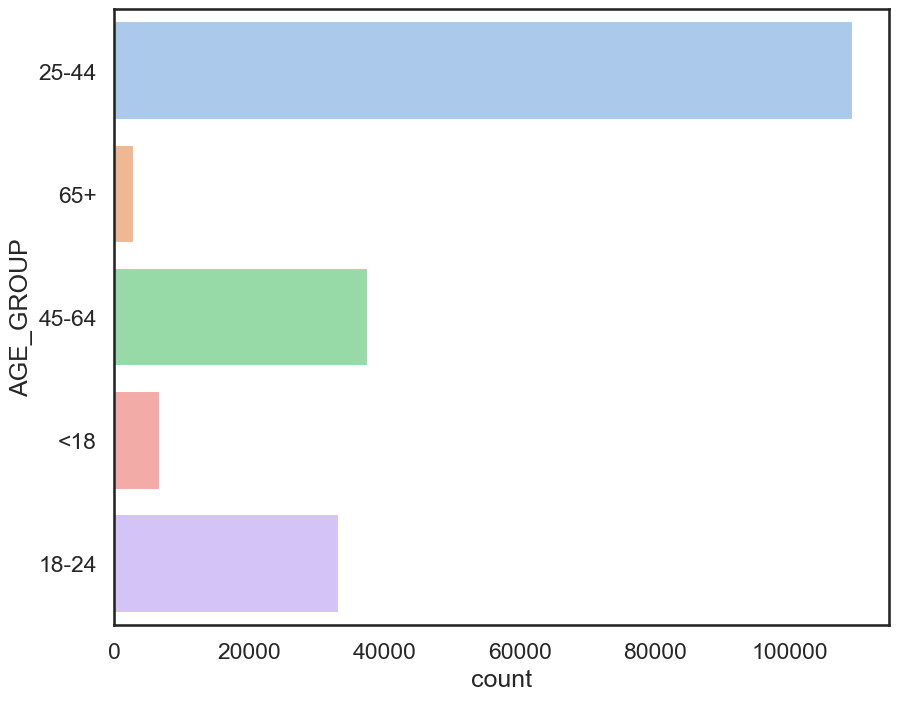

In [48]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y="AGE_GROUP", data=arrest, palette="pastel");

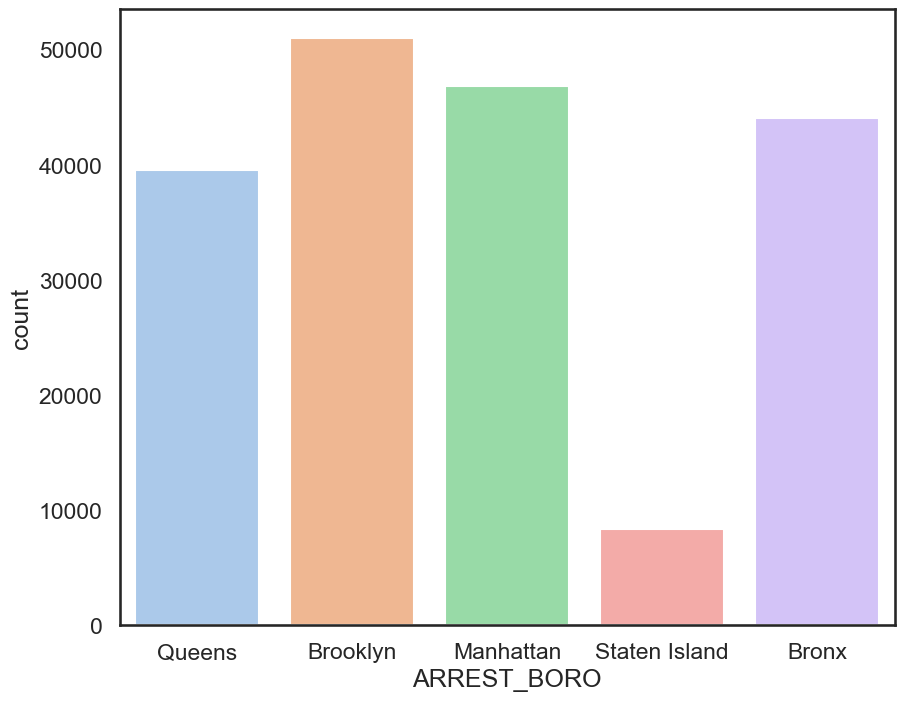

In [49]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x="ARREST_BORO", data=arrest, palette="pastel");

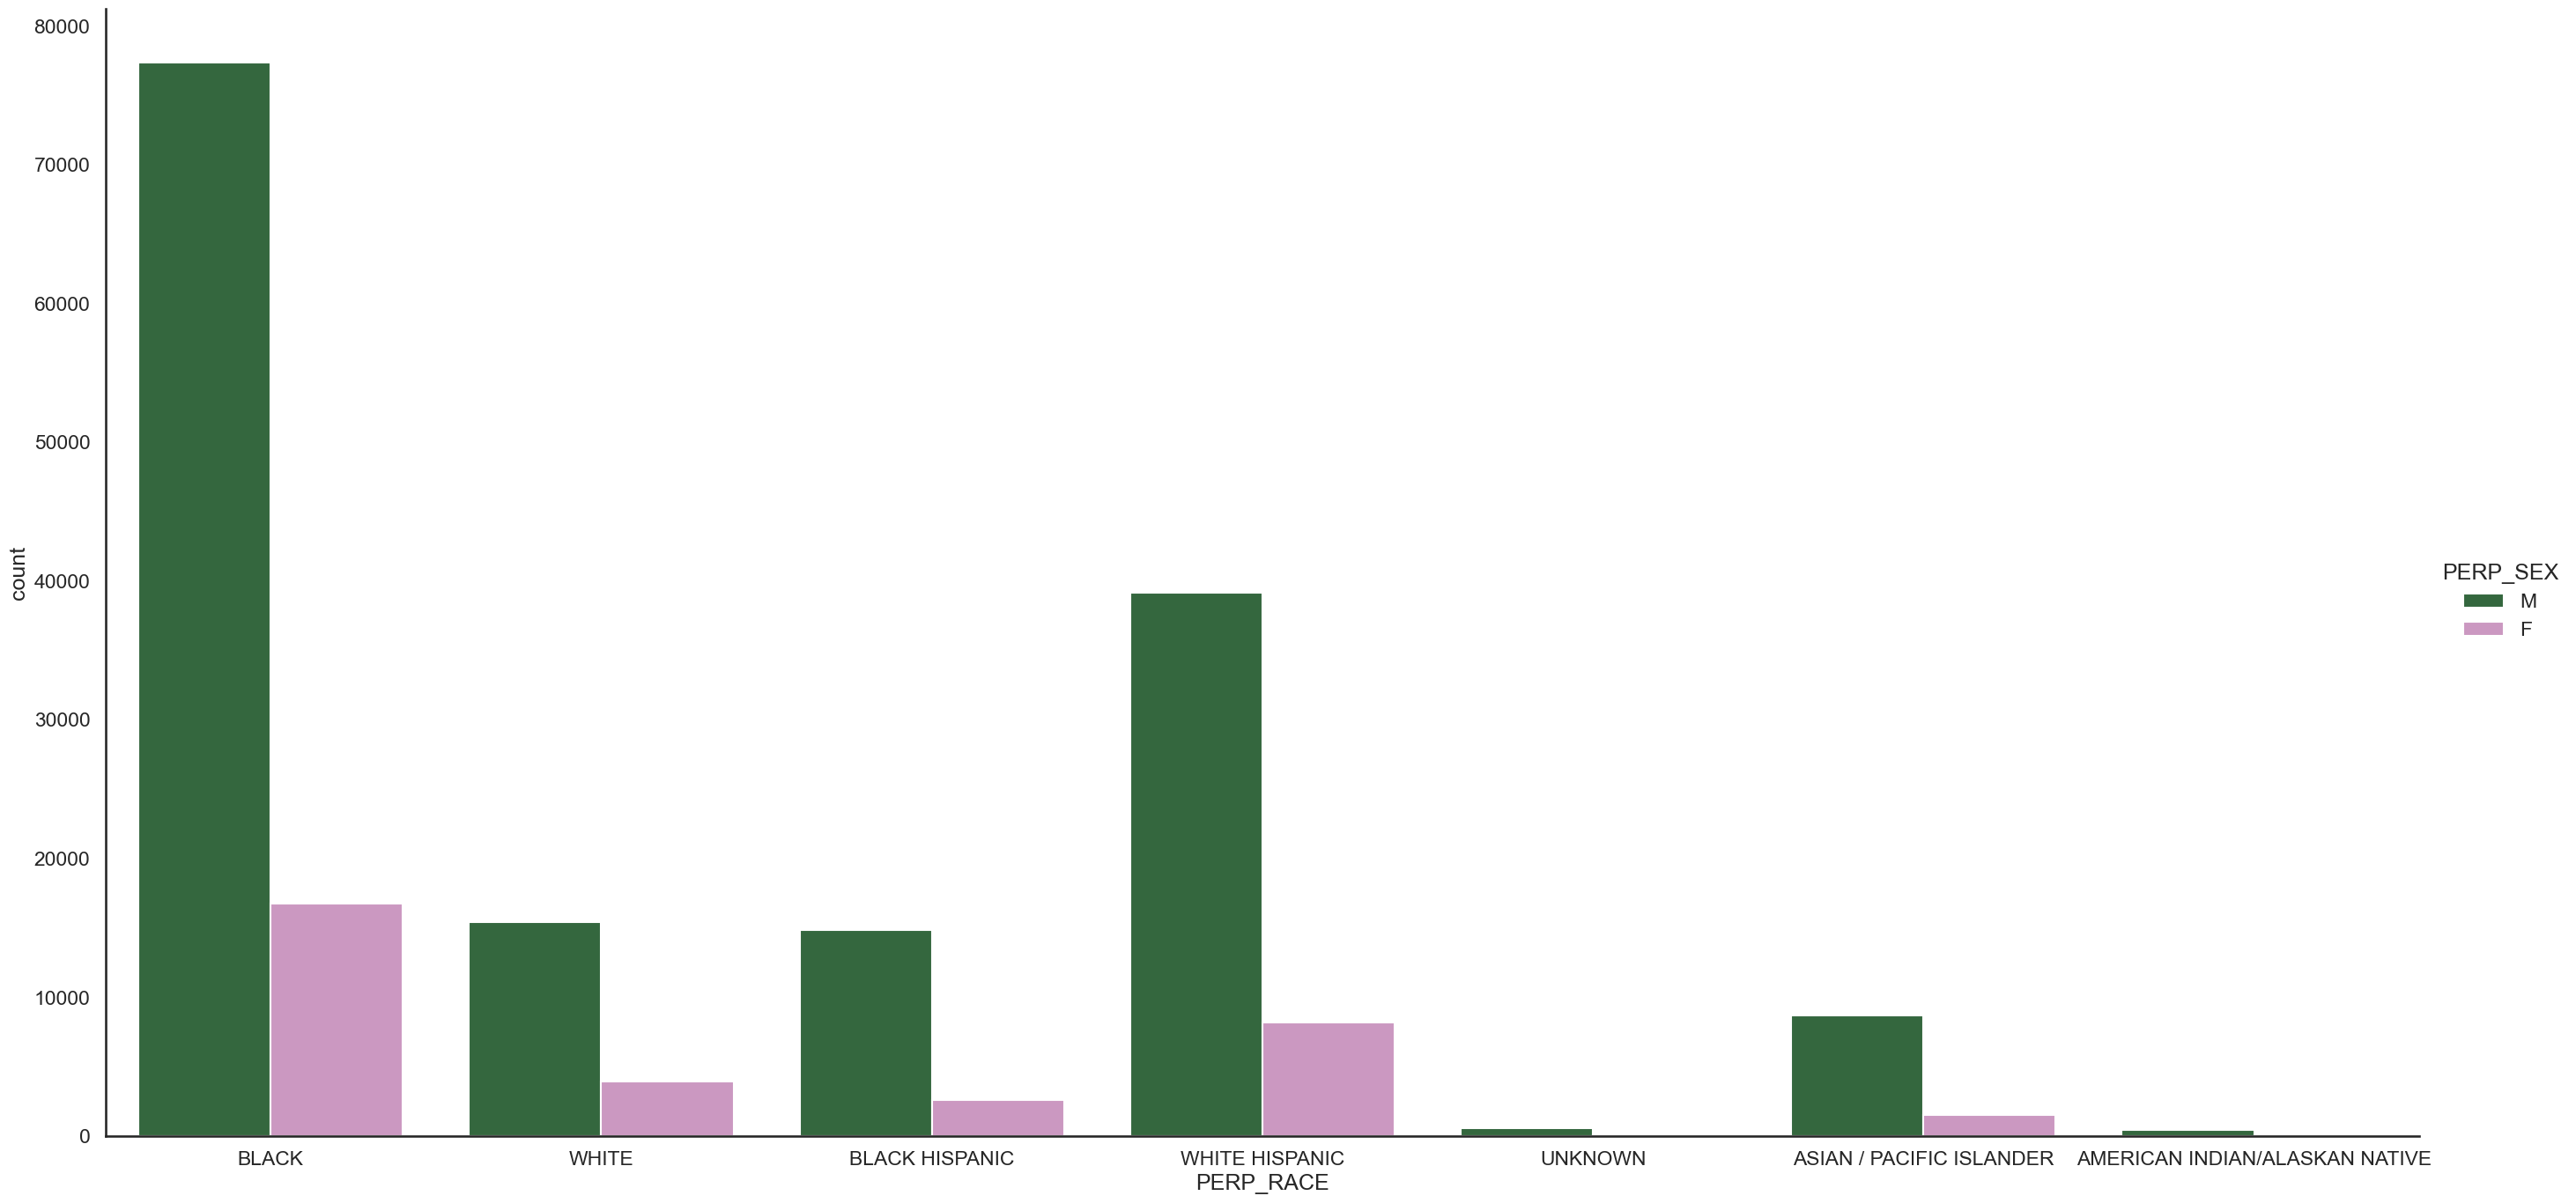

In [50]:
ax = sns.catplot(x="PERP_RACE", hue="PERP_SEX", kind="count",palette="cubehelix", data=arrest, height=14, aspect=2)

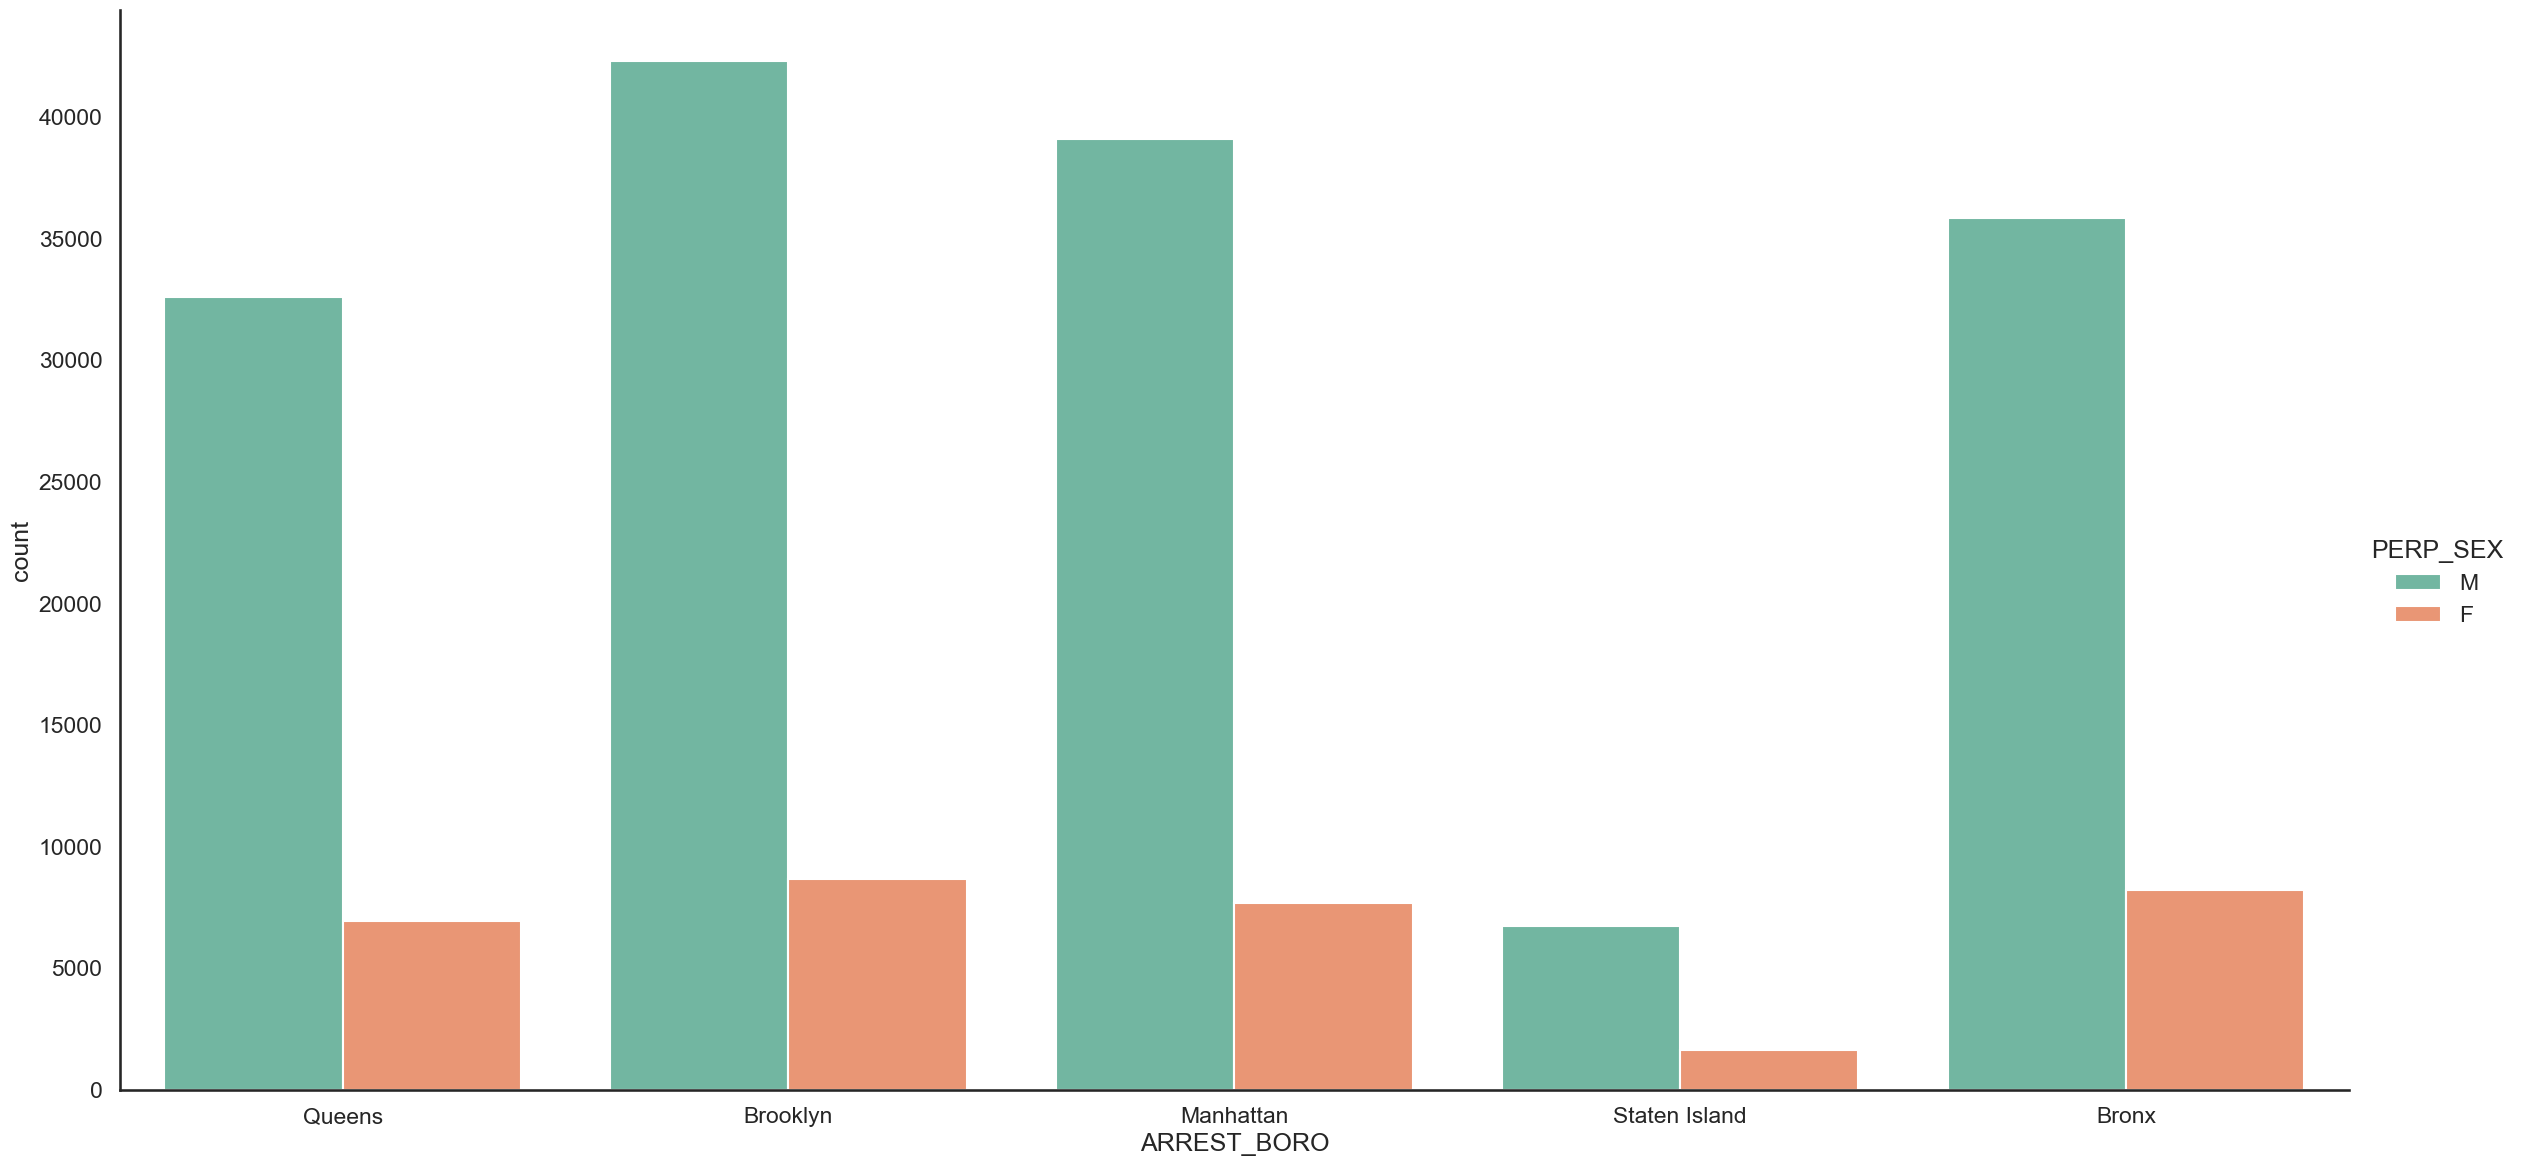

In [51]:
sns.catplot(x="ARREST_BORO", kind="count",hue="PERP_SEX",palette="Set2", data=arrest,height=12, aspect = 2);

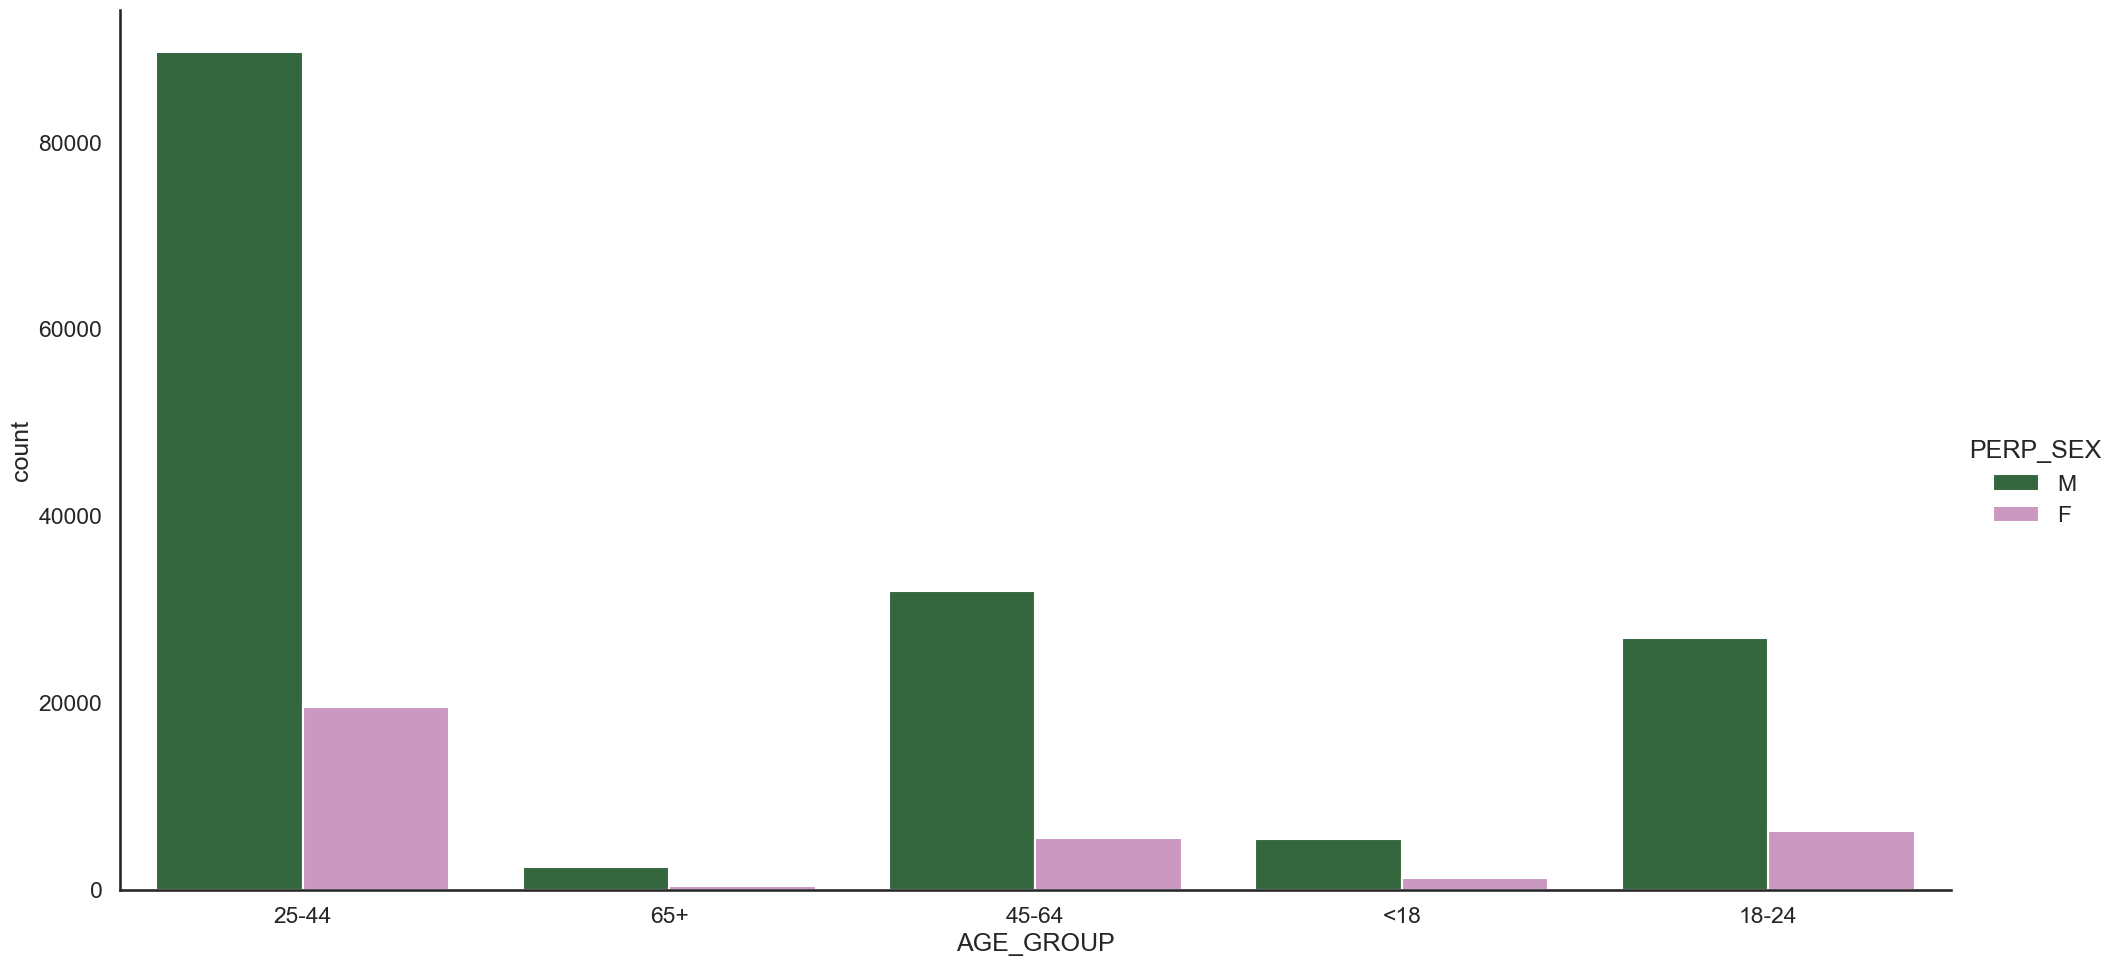

In [52]:
ax = sns.catplot(x="AGE_GROUP", hue="PERP_SEX", kind="count",palette="cubehelix", data=arrest, height=10, aspect = 2)

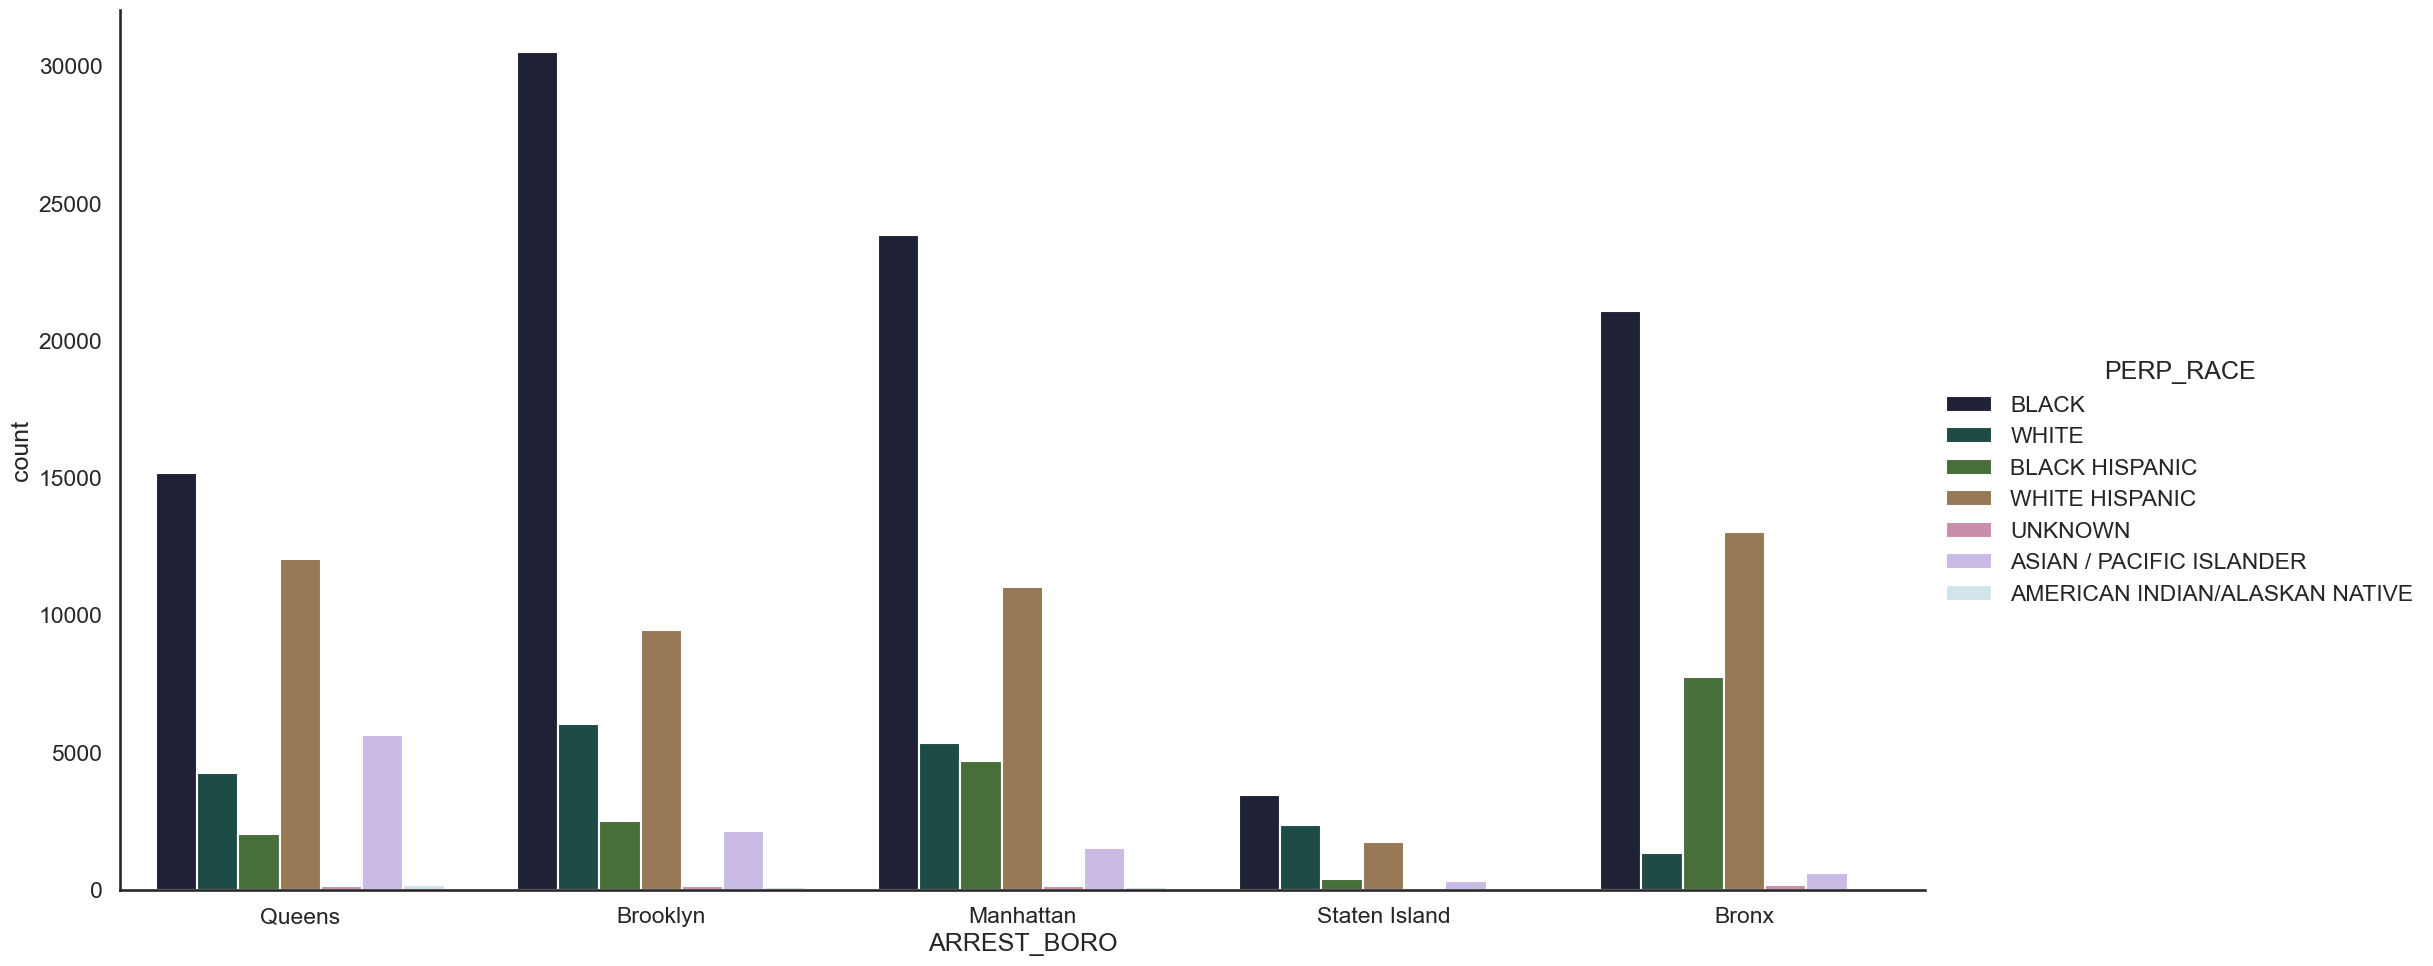

In [53]:
ax = sns.catplot(x="ARREST_BORO", hue="PERP_RACE", kind="count",palette="cubehelix", data=arrest, height=10, aspect = 2)

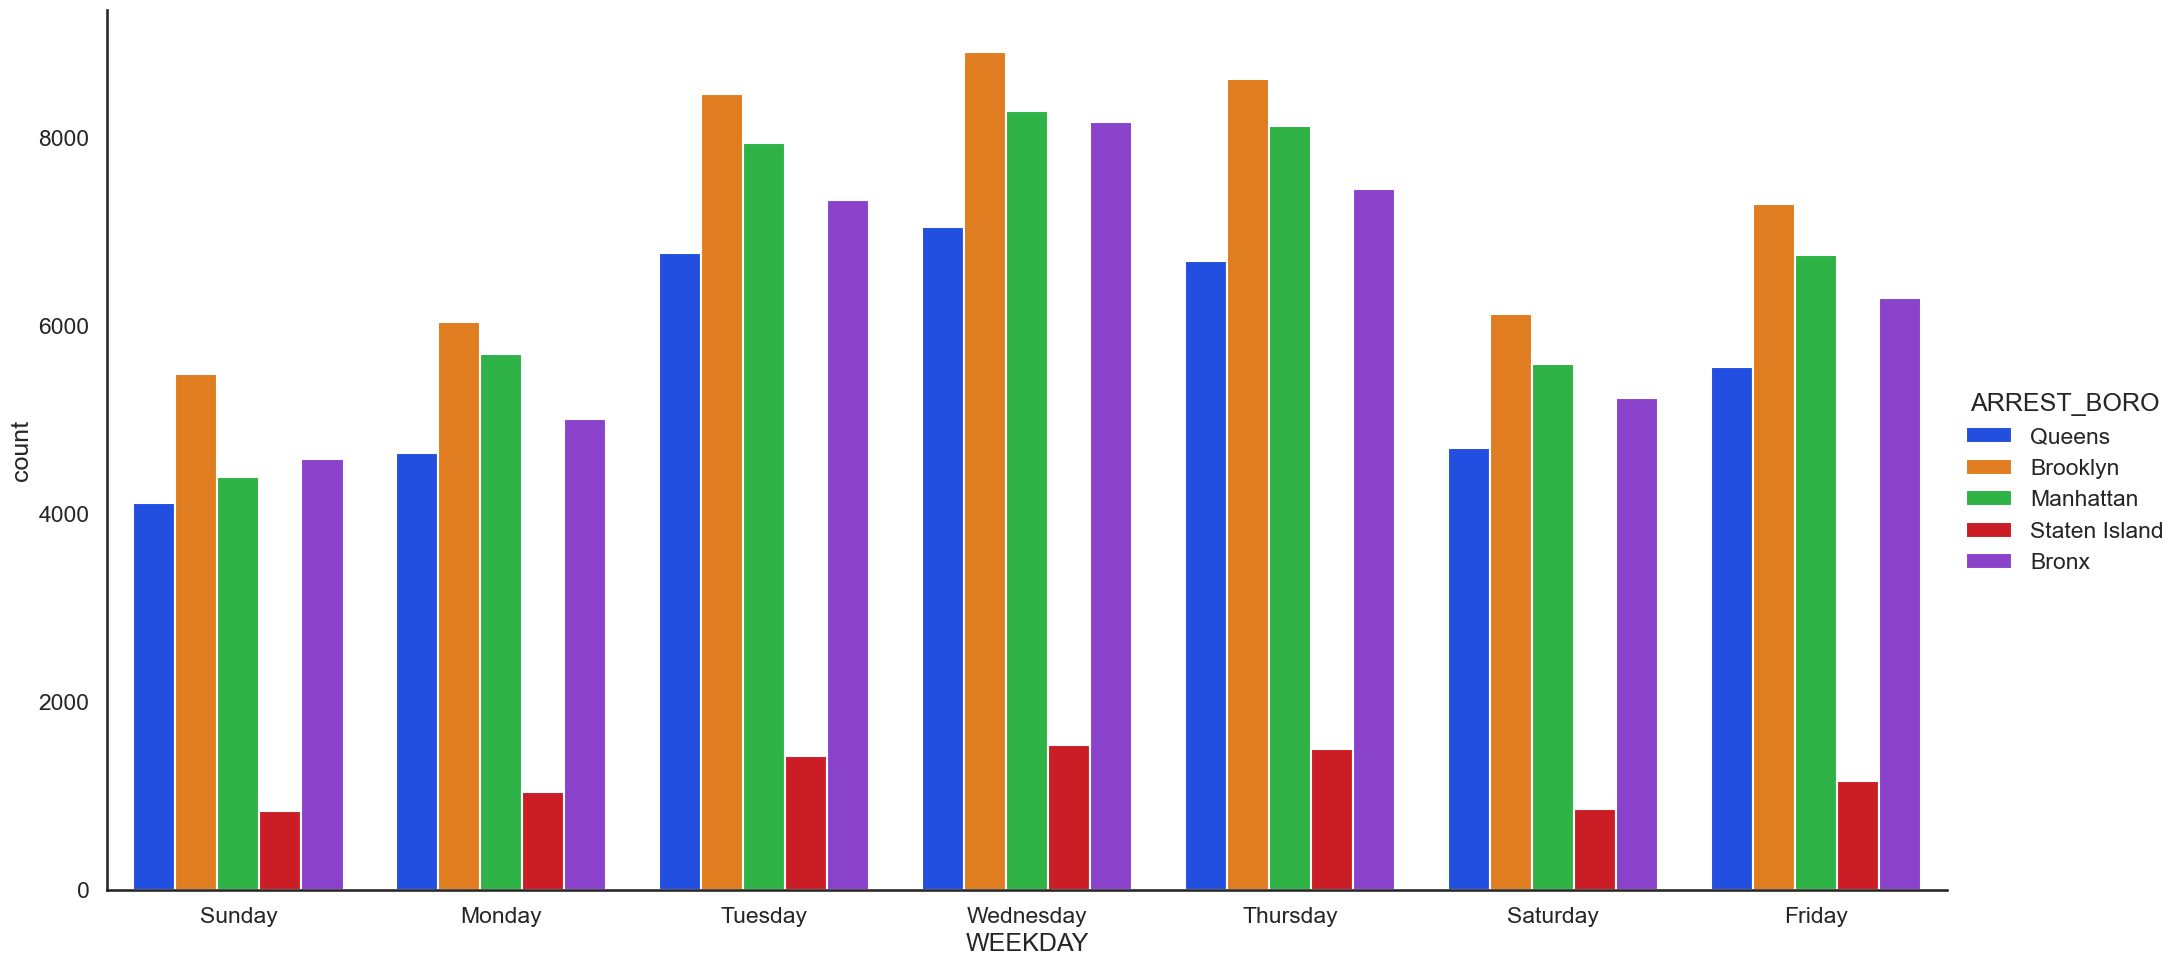

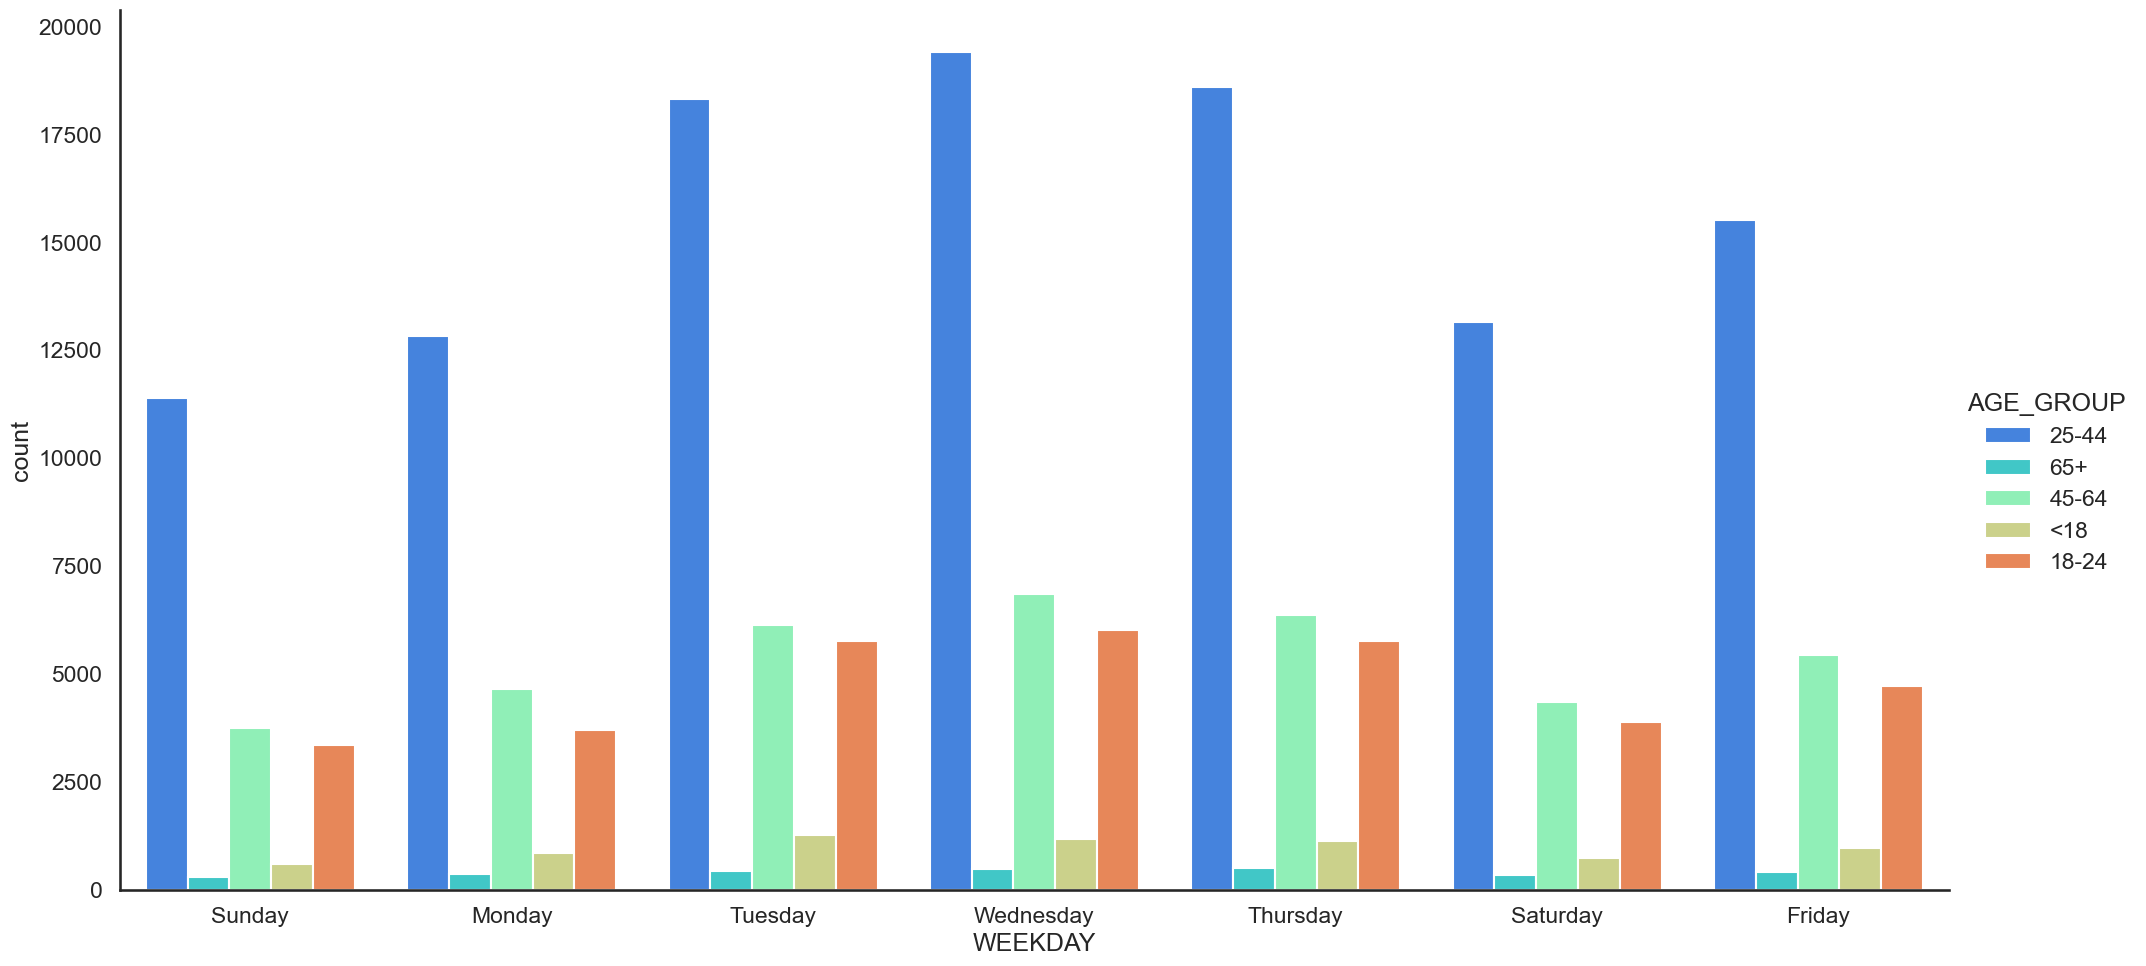

In [54]:
ax = sns.catplot(x="WEEKDAY", hue="ARREST_BORO", kind="count",palette="bright", data=arrest, height=10, aspect = 2)
ax = sns.catplot(x="WEEKDAY", hue="AGE_GROUP", kind="count",palette="rainbow", data=arrest, height=10, aspect = 2)

Heatmap of the crime in New York City.

In [55]:
positions = list(zip(arrest['Latitude'], arrest['Longitude']))
tiles = 'Stamen Terrain'
fol = folium.Map(location=[40.75,-73.98], zoom_start=10, tiles = tiles)
pos_samp = sample(positions, 22000)
HeatMap(pos_samp, radius = 8).add_to(fol) 
fol

In [56]:
edu = pd.read_csv("DYCD_after-school_programs.csv")
edu[:5]

PROGRAM TYPE   
0                              After-School Programs  \
1  After-School Programs,Jobs & Internships,Youth...   
2                              After-School Programs   
3     Reading & Writing,NDA Programs,Family Literacy   
4  After-School Programs,NDA Programs,Youth Educa...   

                            PROGRAM   
0                            Beacon  \
1  In-School Youth Employment (ISY)   
2                Out of School Time   
3               Adolescent Literacy   
4            High-School Aged Youth   

                                           SITE NAME BOROUGH / COMMUNITY   
0                                              IS 49       Staten Island  \
1  Intermediate School 217 - Rafael Hernandez School               Bronx   
2                                     Building T 149              Queens   
3  K 533- School for Democracy and Leadership 600...            Brooklyn   
4                     Voyagees Prepatory High School              Queens   

                                              AGENCY  Contact Number   
0           Jewish Community Center of Staten Island    718.556.1565  \
1       Simpson Street Development Association, Inc.    718.589.1510   
2                     Rockaway Artist Alliance, Inc.  (718) 474-0861   
3                                              CAMBA    718.282.5575   
4  Central Brooklyn Economic Development Corporation  (718) 592-5757   

  Grade Level / Age Group  Location 1  Postcode  Latitude  Longitude   
0                 6 and up        NaN       NaN       NaN        NaN  \
1              High School        NaN       NaN       NaN        NaN   
2                  Elem/MS        NaN       NaN       NaN        NaN   
3            grades 6 to 8        NaN       NaN       NaN        NaN   
4              High School        NaN       NaN       NaN        NaN   

   Community Board  Council District  Census Tract  BIN  BBL  NTA  
0              NaN               NaN           NaN  NaN  NaN  NaN  
1              NaN               NaN           NaN  NaN  NaN  NaN  
2              NaN               NaN           NaN  NaN  NaN  NaN  
3              NaN               NaN           NaN  NaN  NaN  NaN  
4              NaN               NaN           NaN  NaN  NaN  NaN

In [57]:
boro_list = ['Bronx', 'Staten Island', 'Brooklyn', 'Manhattan' , 'Queens']
edu_boro = edu[edu['BOROUGH / COMMUNITY'].isin(boro_list)]

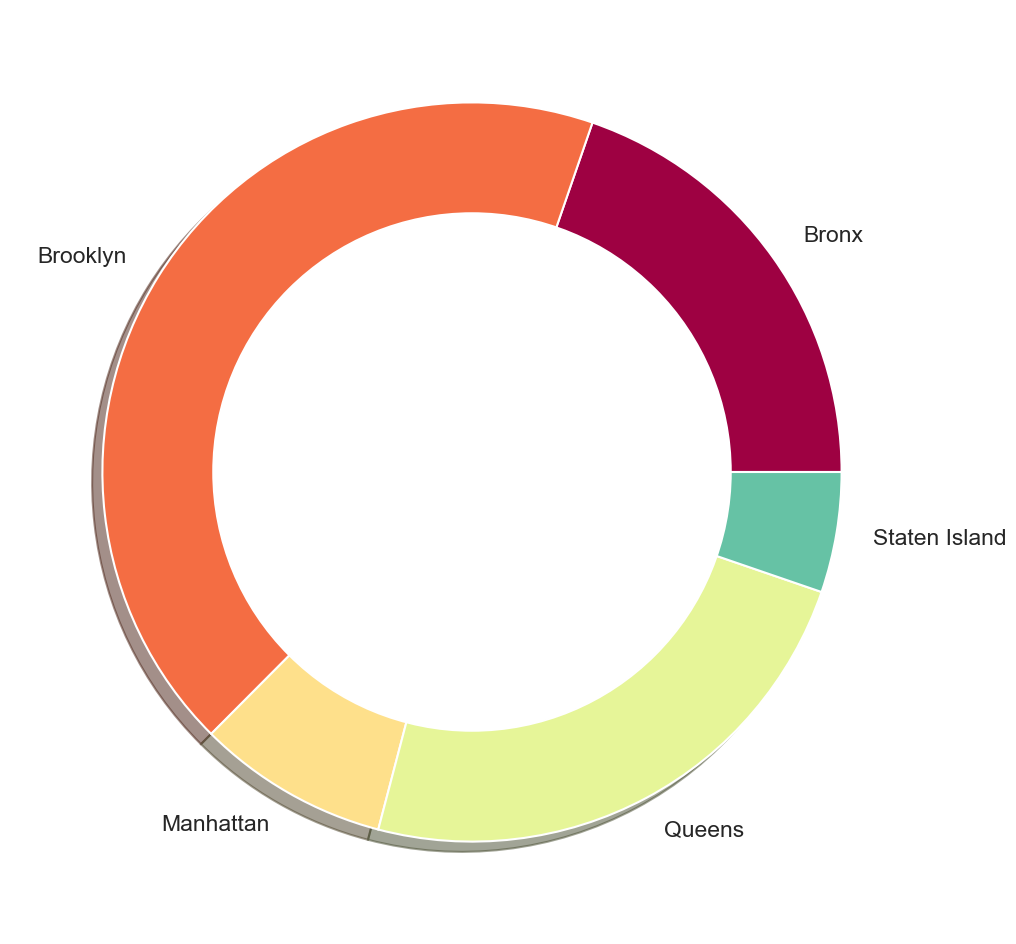

In [58]:
names = edu_boro.groupby('BOROUGH / COMMUNITY').count().index
my_circle=plt.Circle( (0,0), 0.7, color='white')
f, ax = plt.subplots(figsize=(15, 12))
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.pie(edu_boro.groupby('BOROUGH / COMMUNITY').count()['Postcode'], labels=names, colors=colors, shadow=True)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

The heatmap for the after school activities.

In [59]:
positions = [] 
for index, row in edu.iterrows():
    if not math.isnan(row['Latitude']) :
        positions.append((row['Latitude'], row['Longitude']))
fol = folium.Map(location=[40.75,-73.98], zoom_start=11)
HeatMap(positions[:38000], radius = 8).add_to(fol)
fol

Lets plot both after school activites and crimes in New York City. 
- Heatmap - Activities
- Red dots - Crimes

In [60]:
positions_edu = [] 
for index, row in edu.iterrows():
    if not math.isnan(row['Latitude']) :
        positions_edu.append((row['Latitude'], row['Longitude']))
positions_arr = list(zip(arrest['Latitude'], arrest['Longitude']))
fol = folium.Map(location=[40.75,-73.98], zoom_start=11, control_scale=True)

pos_samp = sample(positions_arr, 22000)#22K is the max now as we join both DS togather 
HeatMap(pos_samp, radius = 7).add_to(fol) 

for pos in positions_edu:
    folium.CircleMarker(location=[pos[0],pos[1]], radius=1, color='red', fill=False,).add_to(fol)
fol

In [61]:
def cat_to_num(df, col_name, le=None):
    if le is None:
        le = preprocessing.LabelEncoder()
        le.fit(df[col_name])
    new_col = le.transform(df[col_name])
    return le, new_col

est1 = xgb.XGBRegressor(objective='reg:squarederror')
model1 = MultiOutputRegressor(est1)

est2 = GradientBoostingRegressor()
model2 = MultiOutputRegressor(est2)

x_reg_train = arrest[arrest['month']<6].drop(['LAW_CAT_CD','ARREST_DATE','OFNS_DESC','ARREST_PRECINCT', 'day','year'],axis = 1)
x_reg_test = arrest[arrest['month']==6].drop(['LAW_CAT_CD','ARREST_DATE','OFNS_DESC','ARREST_PRECINCT', 'day', 'year'],axis = 1)

y_train = x_reg_train[['Latitude', 'Longitude']]
y_test = x_reg_test[['Latitude', 'Longitude']]
x_reg_train = x_reg_train.drop(['Latitude', 'Longitude'],axis = 1)
x_reg_test = x_reg_test.drop(['Latitude', 'Longitude'],axis = 1)
x_reg_train = x_reg_train.drop('New Georeferenced Column', axis=1)
x_reg_test = x_reg_test.drop('New Georeferenced Column', axis=1)

d = {}
for col in x_reg_train.columns:
    if x_reg_train.dtypes[col] == 'int32':
        continue
    le, new_col = cat_to_num(x_reg_train, col, le=d.get(col))
    d[col] = le
    x_reg_train[col] = new_col
    x_reg_test[col] = le.fit_transform(x_reg_test[col]) if le is not None else le.fit_transform(x_reg_test[col])
model1.fit(x_reg_train, y_train)
model2.fit(x_reg_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [62]:
pred1 = model1.predict(x_reg_test)
pred2 = model2.predict(x_reg_test)
y_test_mean = y_test.mean(axis=0).tolist()
print("The MSE of XGBF = {}\nThe MSE of GBR = {} ".format(mean_squared_error(y_test, pred1),mean_squared_error(y_test, pred2)))

The MSE of XGBF = 0.0013546135843711306
The MSE of GBR = 0.0013284922848464337 


In [63]:
future_crime = pd.DataFrame({    
    'ARREST_BORO':['Brooklyn','Brooklyn', 'Manhattan','Queens', 'Bronx'], 
    'AGE_GROUP':['<18', '25-44', '18-24', '45-64', '25-44'],
    'PERP_SEX':['M', 'F' , 'F', 'M' , 'F'], 
    'PERP_RACE':['BLACK', 'WHITE', 'WHITE HISPANIC', "WHITE" , 'ASIAN / PACIFIC ISLANDER'], 
    'month':[1,3,4,5,2],
    'WEEKDAY':['Sunday', 'Monday', 'Tuesday', 'Sunday', 'Friday']
    })
for col in future_crime.columns:
    if future_crime.dtypes[col] == 'int64':
        continue
    future_crime[col] = d[col].transform(future_crime[col])
cords1 = model1.predict(future_crime)
cords2 = model2.predict(future_crime)

In [64]:
positions_arr= list(zip(arrest['Latitude'], arrest['Longitude']))

fol = folium.Map(location=[40.75,-73.98], zoom_start=11, control_scale=True)

pos_samp = sample(positions_arr, 22000)
HeatMap(pos_samp, radius = 9).add_to(fol) 

for pos in cords1:
    folium.CircleMarker(location=[pos[0],pos[1]], radius=3, color='red', fill=True).add_to(fol)
for pos in cords2:
    folium.CircleMarker(location=[pos[0],pos[1]], radius=3, color='blue', fill=True).add_to(fol)
fol